In [1]:
import pandas as pd
import gc
import os
import glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
%matplotlib inline

In [2]:
#read csv files
trace = pd.read_csv("Dataset/trace4_dataset.csv")

In [3]:
trace.head(5)

,Unnamed: 0,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
0,0,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
1,1,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
2,2,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
3,3,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
4,4,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0


In [ ]:
trace = trace[:999999,:]

In [4]:
trace = trace.drop('Unnamed: 0', 1)

C:\Users\luqsa\AppData\Local\Temp/ipykernel_22772/4283371849.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trace = trace.drop('Unnamed: 0', 1)


In [5]:
trace.describe(include = "all")

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
count,1.000000e+06,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.163514e+08,0.166586,4.902276e+11,2.074145,-0.044895,0.592045,0.0,2.105019,0.938167,0.004811,0.042146,90.123091
std,1.266963e+08,0.372606,1.253779e+10,10.738565,0.942533,0.929464,0.0,0.438628,0.240852,0.005068,0.137701,9.621074
min,1.000000e+06,0.000000,2.809728e+11,0.000000,-1.100398,-1.385889,0.0,1.000000,0.000000,0.000000,0.000000,87.000000
25%,6.200000e+07,0.000000,4.945463e+11,1.000000,-0.613973,0.231530,0.0,2.000000,1.000000,0.002460,0.001765,87.196660
50%,3.000000e+08,0.000000,4.945463e+11,1.000000,-0.613973,0.239532,0.0,2.000000,1.000000,0.002460,0.002102,87.233467
75%,3.000000e+08,0.000000,4.953396e+11,1.000000,0.005955,1.111748,0.0,2.000000,1.000000,0.004616,0.002862,87.316039
max,3.000000e+08,1.000000,5.043411e+11,360.000000,1.887685,2.340455,0.0,3.000000,1.000000,0.166748,0.875244,140.399093


### 2.2 Data Exploration

In [6]:
trace.columns

Index(['timestamp', 'type', 'collection_id', 'priority',
       'resource_request.cpus', 'resource_request.memory', 'collection_type',
       'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage',
       'power_consumption'],
      dtype='object')

In [7]:
trace["type"].value_counts(normalize = True)

0.0    0.833414
1.0    0.166586
Name: type, dtype: float64

<AxesSubplot:ylabel='type'>

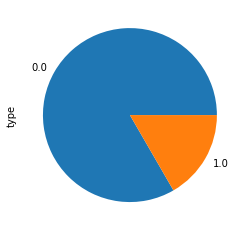

In [8]:
trace["type"].value_counts(normalize = True).plot.pie()

<AxesSubplot:>

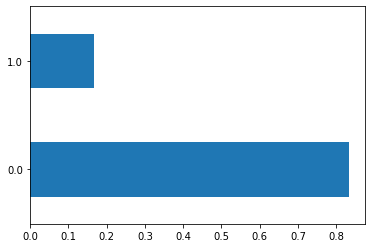

In [9]:
trace['type'].value_counts(normalize=True).plot.barh()

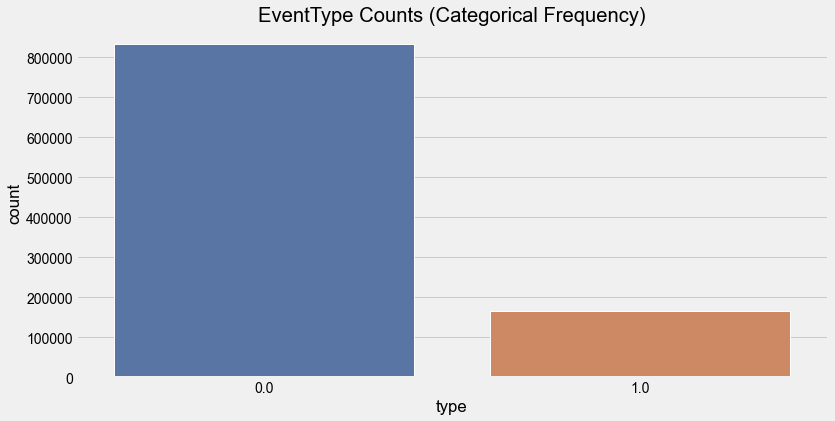

In [10]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
plt.title('EventType Counts (Categorical Frequency)')
sns.set(style="darkgrid")
ax = sns.countplot(x="type", data=trace)

In [11]:
trace.head(5)

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
0,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
1,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
2,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
3,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0
4,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.0,87.0


In [12]:
trace.tail(5)

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
999995,162000000.0,0.0,5.016183e+11,0.0,0.937478,0.411742,0.0,2.0,0.0,0.002804,0.129639,98.717181
999996,138000000.0,0.0,5.016183e+11,0.0,0.937478,0.411742,0.0,2.0,0.0,0.002804,0.160950,101.174498
999997,2000000.0,0.0,5.016183e+11,0.0,0.937478,0.411742,0.0,2.0,0.0,0.002804,0.001474,87.164726
999998,2000000.0,0.0,5.016183e+11,0.0,0.937478,0.411742,0.0,2.0,0.0,0.002804,0.001665,87.185681
999999,87000000.0,0.0,2.809728e+11,0.0,-0.023126,0.003504,0.0,2.0,0.0,0.001780,0.001167,87.130862


#### Intial Understanding

In [13]:
trace.shape

(1000000, 12)

In [14]:
trace.head(30)

,timestamp,type,collection_id,priority,resource_request.cpus,resource_request.memory,collection_type,vertical_scaling,scheduler,assigned_memory,cpu_usage,power_consumption
0,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
1,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
2,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
3,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
4,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
5,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
6,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
7,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
8,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000
9,1000000.0,1.0,4.588266e+11,1.0,0.416916,2.259689,0.0,1.0,1.0,0.015625,0.000000,87.000000


In [15]:
Y = trace['type'].to_numpy()
X = trace.drop(['type', 'timestamp'], axis = 1).to_numpy()

In [16]:
print('Features Shape', X.shape)
print('Labels Shape', Y.shape)

Features Shape (1000000, 10)
Labels Shape (1000000,)


#### Fitting the training and test data without imbalance handling

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### Imbalanced Data Model Fit - Random Undersampling

In [18]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')

In [19]:
X_train_RUS, Y_train_RUS = undersample.fit_resample(X_train, Y_train)

<AxesSubplot:>

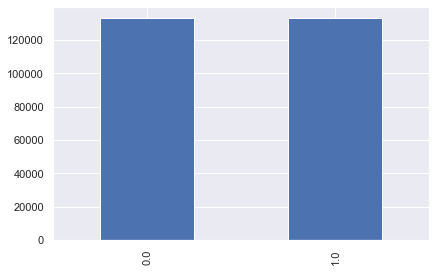

In [20]:
pd.Series(Y_train_RUS).value_counts().plot.bar()

In [21]:
X_test_RUS, Y_test_RUS = undersample.fit_resample(X_test, Y_test)

<AxesSubplot:>

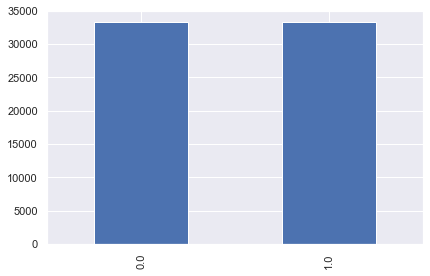

In [22]:
pd.Series(Y_test_RUS).value_counts().plot.bar()

#### Imbalanced Data Model Fit - Random Oversampling

In [23]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

In [24]:
X_train_ROS, Y_train_ROS = oversample.fit_resample(X_train, Y_train)

<AxesSubplot:>

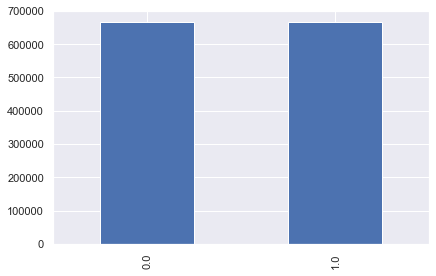

In [25]:
pd.Series(Y_train_ROS).value_counts().plot.bar()

In [26]:
X_test_ROS, Y_test_ROS = oversample.fit_resample(X_test, Y_test)

<AxesSubplot:>

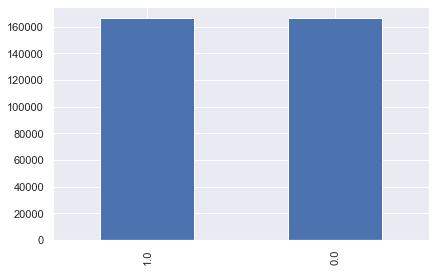

In [27]:
pd.Series(Y_test_ROS).value_counts().plot.bar()

#### Imbalanced Data Model Fit - SMOTE

In [28]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 33)

In [29]:
X_train_SMOTE, Y_train_SMOTE = oversample.fit_resample(X_train, Y_train)

<AxesSubplot:>

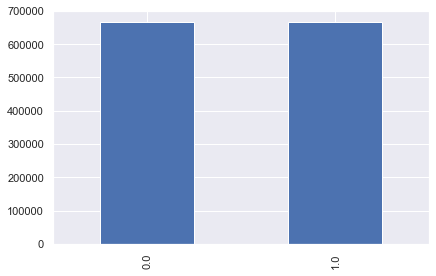

In [30]:
pd.Series(Y_train_SMOTE).value_counts().plot.bar()

In [31]:
X_test_SMOTE, Y_test_SMOTE = oversample.fit_resample(X_test, Y_test)

<AxesSubplot:>

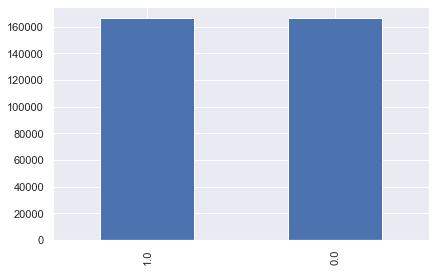

In [32]:
pd.Series(Y_test_SMOTE).value_counts().plot.bar()

In [33]:
#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import PowerTransformer

#Models
from tensorflow import keras
from keras import models
from keras import layers
from keras import optimizers

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier, VotingClassifier, RandomTreesEmbedding

### Machine Learning Algorithms

In [39]:
clfs = []
seed = 1234

clfs.append(("LogReg", 
             Pipeline([("power", PowerTransformer()), 
                       ("Scaler", StandardScaler()),
                       ("LogReg", LogisticRegression())])))

clfs.append(("DecisionTreeClassifier", 
             Pipeline([("power", PowerTransformer()), 
                       ("Scaler", StandardScaler()),
                       ("DecisionTrees", DecisionTreeClassifier())])))

clfs.append(("RandomForestClassifier", 
             Pipeline([("power", PowerTransformer()), 
                       ("Scaler", StandardScaler()),
                       ("RandomForest", RandomForestClassifier())]))) 

clfs.append(("GradientBoostingClassifier", 
             Pipeline([("power", PowerTransformer()), 
                       ("Scaler", StandardScaler()),
                       ("GradientBoosting", GradientBoostingClassifier())]))) 

clfs.append(("XGBClassifier",
             Pipeline([("power", PowerTransformer()), 
                       ("Scaler", StandardScaler()),
                       ("XGB", XGBClassifier())])))  

#### Accuracy Scoring Without Imbalance Data Handling

In [40]:
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

print('Model: Accuracy')
print('===============')
for name, model  in clfs:
    kfold = KFold(n_splits = n_folds, shuffle = True, random_state = seed)
    model.fit(X_train, Y_train)
    cv_results = cross_val_score(model, X_train, Y_train, cv= 10, scoring=scoring, n_jobs=-1)    
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f" % (name, cv_results.mean()*100)
    print(msg)
    joblib.dump(model, name + '.model')

Model: Accuracy


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


LogReg: 90.944750


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


DecisionTreeClassifier: 94.552375


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


RandomForestClassifier: 91.012500


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


GradientBoostingClassifier: 98.651375


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:21:46] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 99.049875


#### Accuracy Scoring With Imbalance Data Handling - Random Undersampling

In [54]:
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

print('Model: Accuracy')
print('===============')
for name, model  in clfs:
    model.fit(X_train_RUS, Y_train_RUS)
    kfold = KFold(n_splits = n_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train_RUS, Y_train_RUS, cv= 10, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f" % (name, cv_results.mean()*100)
    print(msg)
    joblib.dump(model, name + '.model')

Model: Accuracy


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


LogReg: 82.346475


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


DecisionTreeClassifier: 88.732671


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


RandomForestClassifier: 85.264281


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


GradientBoostingClassifier: 98.941577


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:32:58] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 99.258354


#### Accuracy Scoring With Imbalance Data Handling - Random Oversampling

In [56]:
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

print('Model: Accuracy')
print('===============')
for name, model  in clfs:
    model.fit(X_train_ROS, Y_train_ROS)
    kfold = KFold(n_splits = n_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train_ROS, Y_train_ROS, cv= 10, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f" % (name, cv_results.mean()*100)
    print(msg)
    joblib.dump(model, name + '.model')

Model: Accuracy


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


LogReg: 82.305413


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


DecisionTreeClassifier: 88.752713


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


RandomForestClassifier: 85.359106


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


GradientBoostingClassifier: 98.948758


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:44:59] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 99.298197


#### Accuracy Scoring With Imbalance Data Handling - SMOTE

In [57]:
scoring = 'accuracy'
n_folds = 10

results, names  = [], [] 

print('Model: Accuracy')
print('===============')
for name, model  in clfs:
    model.fit(X_train_SMOTE, Y_train_SMOTE)
    kfold = KFold(n_splits = n_folds, shuffle = True, random_state = seed)
    cv_results = cross_val_score(model, X_train_SMOTE, Y_train_SMOTE, cv= 10, scoring=scoring, n_jobs=-1)
    names.append(name)
    results.append(cv_results)    
    msg = "%s: %f" % (name, cv_results.mean()*100)
    print(msg)
    joblib.dump(model, name + '.model')

Model: Accuracy


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


LogReg: 82.295140


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


DecisionTreeClassifier: 88.720168


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


RandomForestClassifier: 85.768983


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


GradientBoostingClassifier: 98.945909


C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\envs\vuze\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:52:50] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier: 99.280126


### Showing All Evalution Metrics Without Imbalance Data Handling

LogReg


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9771788897064835


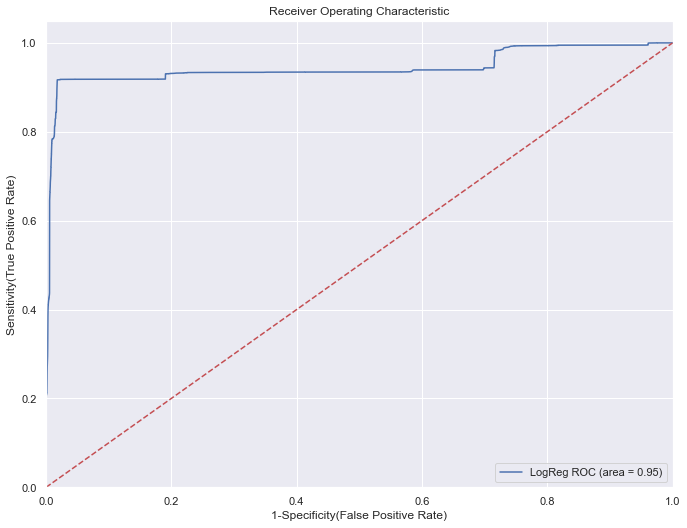

Classification Report - Training
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99   8853675
         1.0       0.81      0.92      0.86    735429

    accuracy                           0.98   9589104
   macro avg       0.90      0.95      0.92   9589104
weighted avg       0.98      0.98      0.98   9589104

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99   3794322
         1.0       0.81      0.92      0.86    315294

    accuracy                           0.98   4109616
   macro avg       0.90      0.95      0.92   4109616
weighted avg       0.98      0.98      0.98   4109616

Confusion Matrix - Training
[[8696056  157619]
 [  60956  674473]]
Confusion Matrix - Testing
[[3726836   67486]
 [  26300  288994]]


DecisionTreeClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9989850633246513


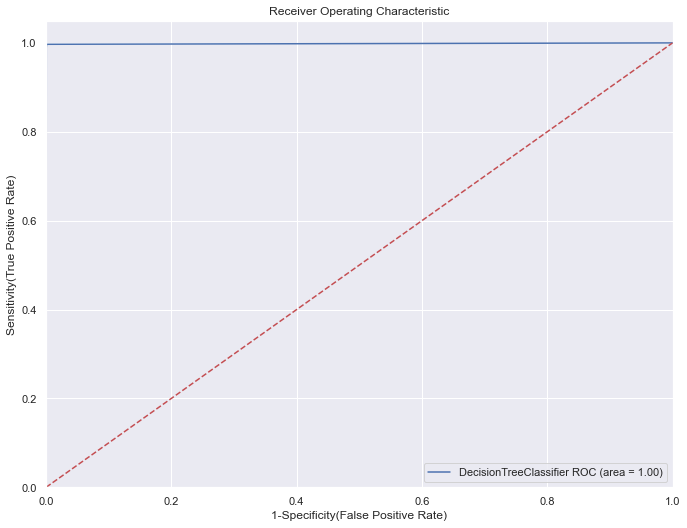

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      0.99      1.00    735429

    accuracy                           1.00   9589104
   macro avg       1.00      1.00      1.00   9589104
weighted avg       1.00      1.00      1.00   9589104

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       1.00      0.99      0.99    315294

    accuracy                           1.00   4109616
   macro avg       1.00      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8852594    1081]
 [   4224  731205]]
Confusion Matrix - Testing
[[3792824    1498]
 [   2673  312621]]


RandomForestClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9989945532623973


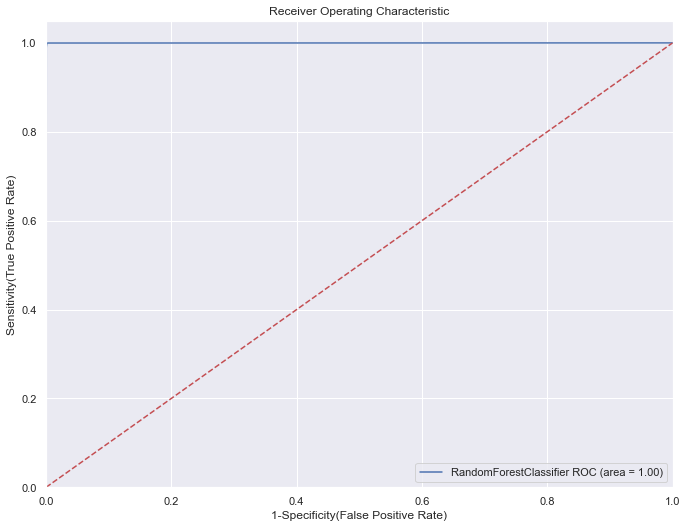

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00    735429

    accuracy                           1.00   9589104
   macro avg       1.00      1.00      1.00   9589104
weighted avg       1.00      1.00      1.00   9589104

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      0.99      0.99    315294

    accuracy                           1.00   4109616
   macro avg       1.00      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8851900    1775]
 [   3534  731895]]
Confusion Matrix - Testing
[[3792554    1768]
 [   2364  312930]]


GradientBoostingClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9952642777330047


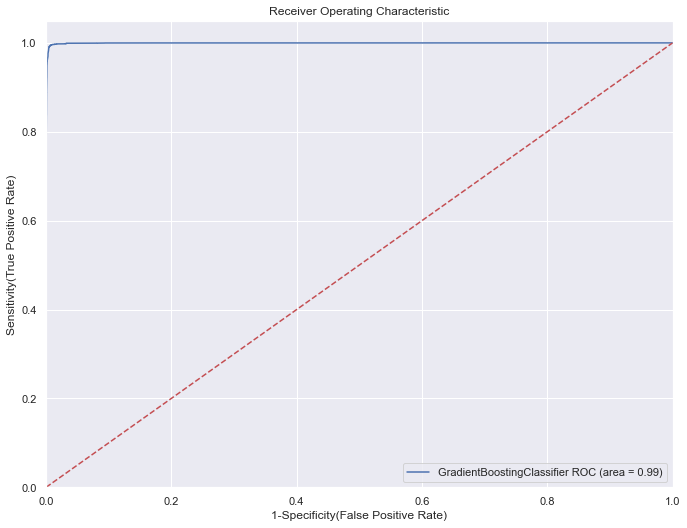

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       0.95      0.99      0.97    735429

    accuracy                           1.00   9589104
   macro avg       0.98      0.99      0.98   9589104
weighted avg       1.00      1.00      1.00   9589104

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.95      0.99      0.97    315294

    accuracy                           1.00   4109616
   macro avg       0.98      0.99      0.98   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8816562   37113]
 [   8253  727176]]
Confusion Matrix - Testing
[[3778462   15860]
 [   3602  311692]]


XGBClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:33:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9990551428649295


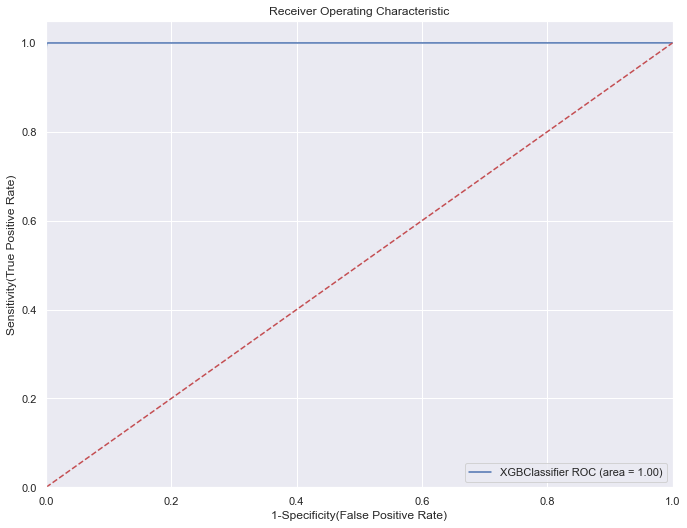

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       0.99      0.99      0.99    735429

    accuracy                           1.00   9589104
   macro avg       1.00      1.00      1.00   9589104
weighted avg       1.00      1.00      1.00   9589104

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      0.99      0.99    315294

    accuracy                           1.00   4109616
   macro avg       1.00      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8849980    3695]
 [   5308  730121]]
Confusion Matrix - Testing
[[3792707    1615]
 [   2268  313026]]




In [30]:
from sklearn import metrics
for name, model  in clfs:
    print(name)
    model.fit(X_train, Y_train)
    y_pred_train = model.predict(X_train)
    y_pred = model.predict(X_test)
    # Compute False postive rate, and True positive rate
    print('Accuracy', accuracy_score(Y_test,y_pred))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,y_pred)
    # Now, plot the computed values
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   
    
    print('Classification Report - Training')
    print(classification_report(Y_train,y_pred_train))
    print('Classification Report - Testing')
    print(classification_report(Y_test,y_pred))

    print('Confusion Matrix - Training')
    print(confusion_matrix(Y_train,y_pred_train))
    print('Confusion Matrix - Testing')
    print(confusion_matrix(Y_test,y_pred))
    print('\n')

### Showing All Evalution Metrics With Imbalance Data Handling - Random Undersampling

LogReg


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9605668753479644


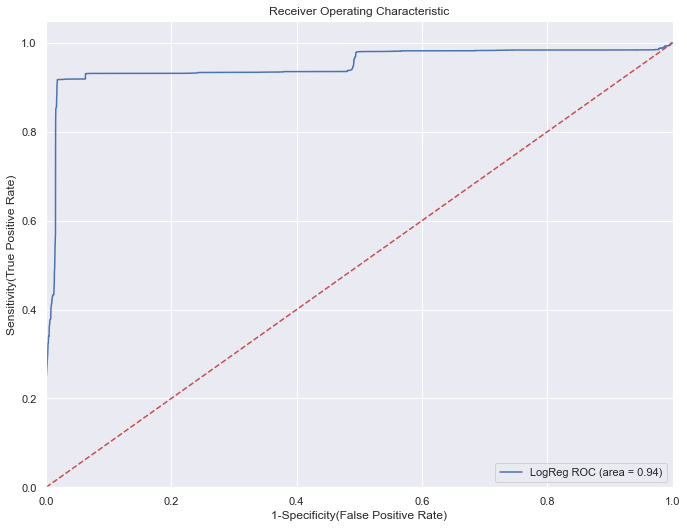

Classification Report - Training
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94    735429
         1.0       0.96      0.92      0.94    735429

    accuracy                           0.94   1470858
   macro avg       0.94      0.94      0.94   1470858
weighted avg       0.94      0.94      0.94   1470858

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98   3794322
         1.0       0.68      0.92      0.78    315294

    accuracy                           0.96   4109616
   macro avg       0.84      0.94      0.88   4109616
weighted avg       0.97      0.96      0.96   4109616

Confusion Matrix - Training
[[708952  26477]
 [ 59484 675945]]
Confusion Matrix - Testing
[[3657942  136380]
 [  25675  289619]]


DecisionTreeClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.99880451117574


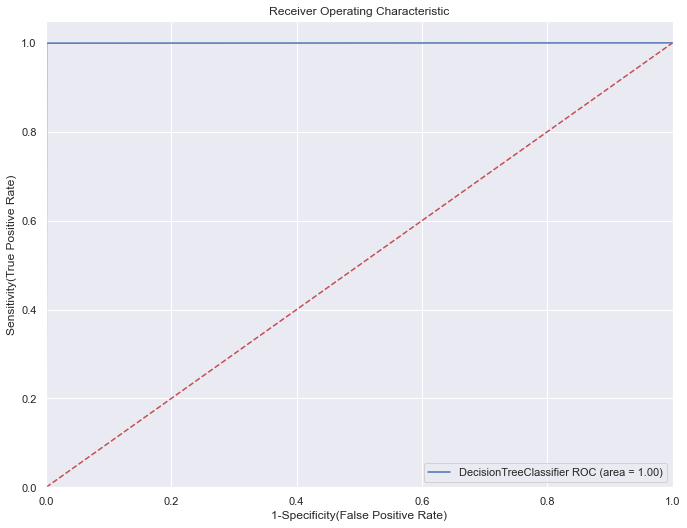

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    735429
         1.0       1.00      1.00      1.00    735429

    accuracy                           1.00   1470858
   macro avg       1.00      1.00      1.00   1470858
weighted avg       1.00      1.00      1.00   1470858

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[735032    397]
 [   184 735245]]
Confusion Matrix - Testing
[[3789691    4631]
 [    282  315012]]


RandomForestClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9985782126602583


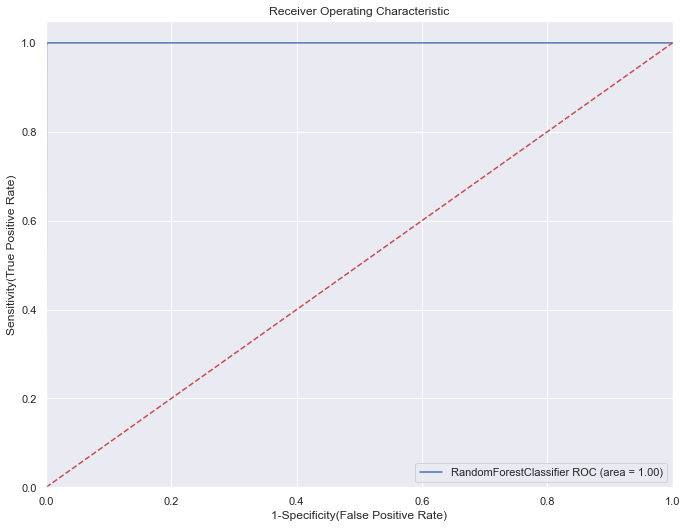

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    735429
         1.0       1.00      1.00      1.00    735429

    accuracy                           1.00   1470858
   macro avg       1.00      1.00      1.00   1470858
weighted avg       1.00      1.00      1.00   1470858

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.98      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[734889    540]
 [    41 735388]]
Confusion Matrix - Testing
[[3788687    5635]
 [    208  315086]]


GradientBoostingClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9924389529338021


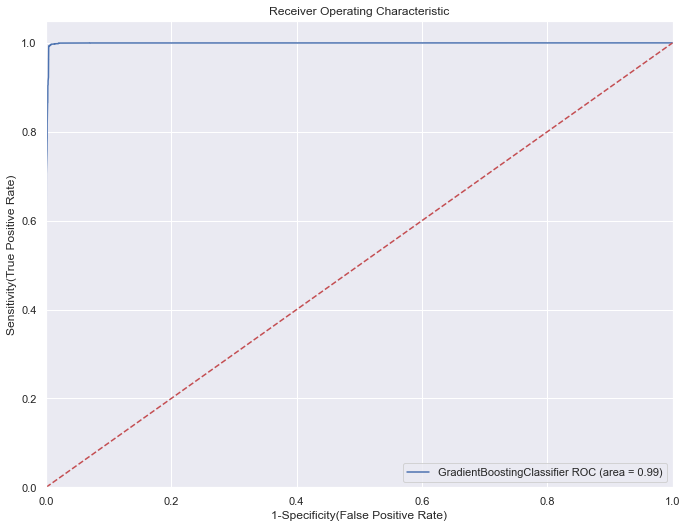

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    735429
         1.0       0.99      1.00      0.99    735429

    accuracy                           0.99   1470858
   macro avg       0.99      0.99      0.99   1470858
weighted avg       0.99      0.99      0.99   1470858

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   3794322
         1.0       0.91      1.00      0.95    315294

    accuracy                           0.99   4109616
   macro avg       0.96      0.99      0.97   4109616
weighted avg       0.99      0.99      0.99   4109616

Confusion Matrix - Training
[[729589   5840]
 [  2485 732944]]
Confusion Matrix - Testing
[[3764363   29959]
 [   1114  314180]]


XGBClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:48:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.998394253867028


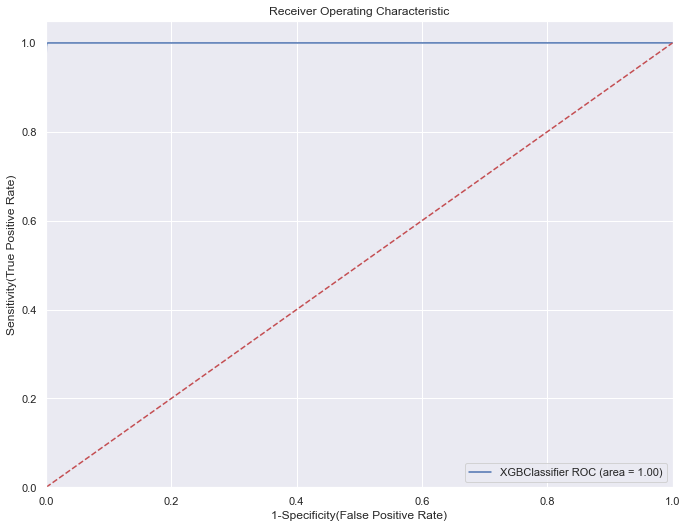

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    735429
         1.0       1.00      1.00      1.00    735429

    accuracy                           1.00   1470858
   macro avg       1.00      1.00      1.00   1470858
weighted avg       1.00      1.00      1.00   1470858

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.98      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      0.99   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[734220   1209]
 [    55 735374]]
Confusion Matrix - Testing
[[3787763    6559]
 [     40  315254]]




In [31]:
from sklearn import metrics
for name, model  in clfs:
    print(name)
    model.fit(X_train_RUS, Y_train_RUS)
    y_pred_train_RUS = model.predict(X_train_RUS)
    y_pred_RUS = model.predict(X_test)
    # Compute False postive rate, and True positive rate
    print('Accuracy', accuracy_score(Y_test,y_pred_RUS))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,y_pred_RUS)
    # Now, plot the computed values
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   
    
    print('Classification Report - Training')
    print(classification_report(Y_train_RUS,y_pred_train_RUS))
    print('Classification Report - Testing')
    print(classification_report(Y_test,y_pred_RUS))

    print('Confusion Matrix - Training')
    print(confusion_matrix(Y_train_RUS,y_pred_train_RUS))
    print('Confusion Matrix - Testing')
    print(confusion_matrix(Y_test,y_pred_RUS))
    print('\n')

### Showing All Evalution Metrics With Imbalance Data Handling - Random Oversampling

LogReg


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9602792572347392


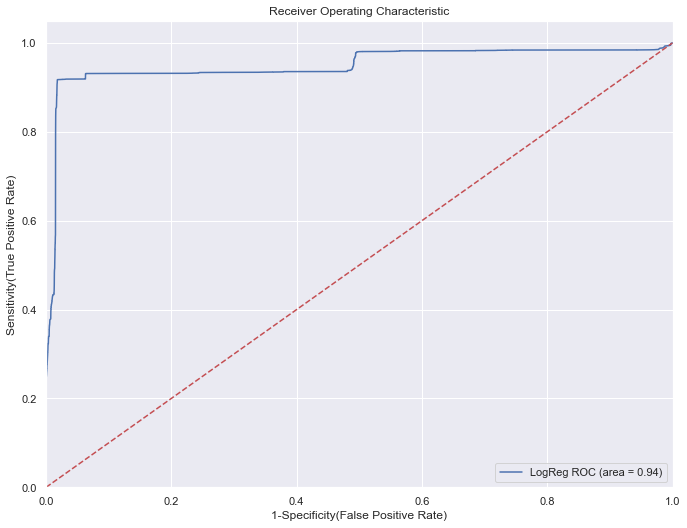

Classification Report - Training
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94   8853675
         1.0       0.96      0.92      0.94   8853675

    accuracy                           0.94  17707350
   macro avg       0.94      0.94      0.94  17707350
weighted avg       0.94      0.94      0.94  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98   3794322
         1.0       0.68      0.92      0.78    315294

    accuracy                           0.96   4109616
   macro avg       0.84      0.94      0.88   4109616
weighted avg       0.97      0.96      0.96   4109616

Confusion Matrix - Training
[[8533518  320157]
 [ 715558 8138117]]
Confusion Matrix - Testing
[[3656758  137564]
 [  25673  289621]]


DecisionTreeClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9988682640908543


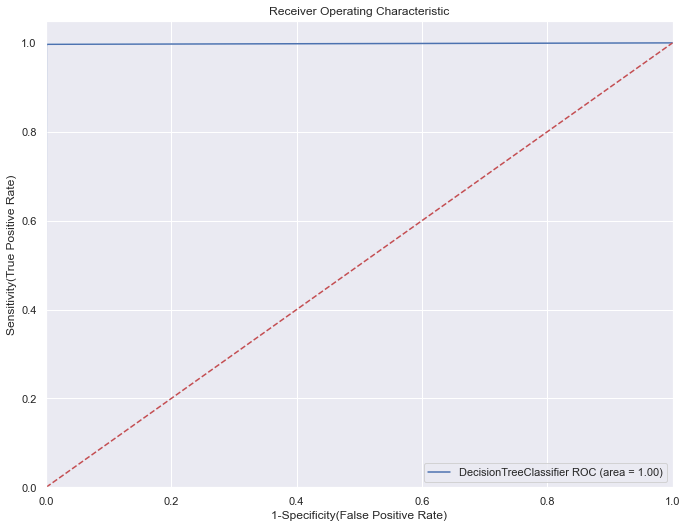

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8846473    7202]
 [     84 8853591]]
Confusion Matrix - Testing
[[3790660    3662]
 [    989  314305]]


RandomForestClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9988410109363016


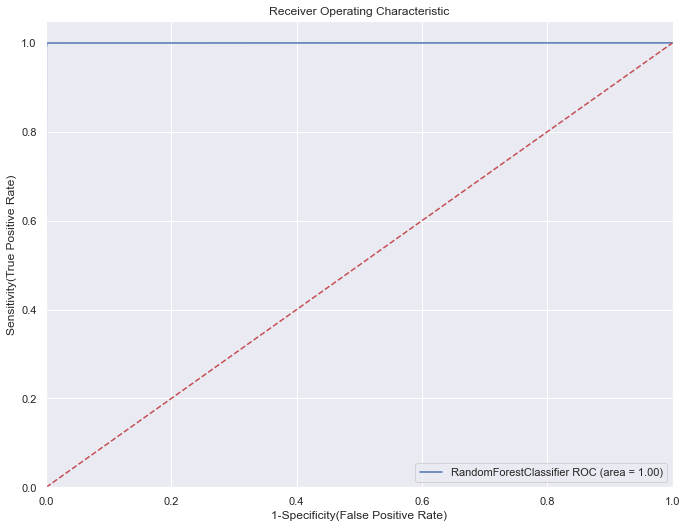

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8846463    7212]
 [     78 8853597]]
Confusion Matrix - Testing
[[3790531    3791]
 [    972  314322]]


GradientBoostingClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9924185130678876


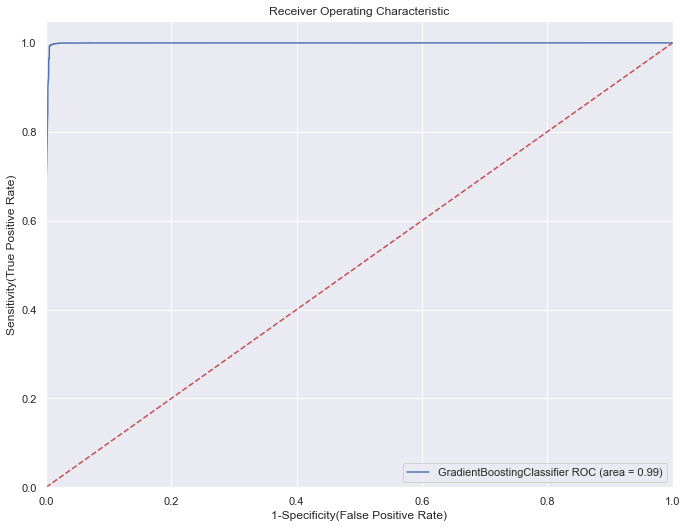

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   8853675
         1.0       0.99      1.00      0.99   8853675

    accuracy                           0.99  17707350
   macro avg       0.99      0.99      0.99  17707350
weighted avg       0.99      0.99      0.99  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   3794322
         1.0       0.91      1.00      0.95    315294

    accuracy                           0.99   4109616
   macro avg       0.96      0.99      0.97   4109616
weighted avg       0.99      0.99      0.99   4109616

Confusion Matrix - Training
[[8783579   70096]
 [  30533 8823142]]
Confusion Matrix - Testing
[[3764292   30030]
 [   1127  314167]]


XGBClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:38:44] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9985351429427957


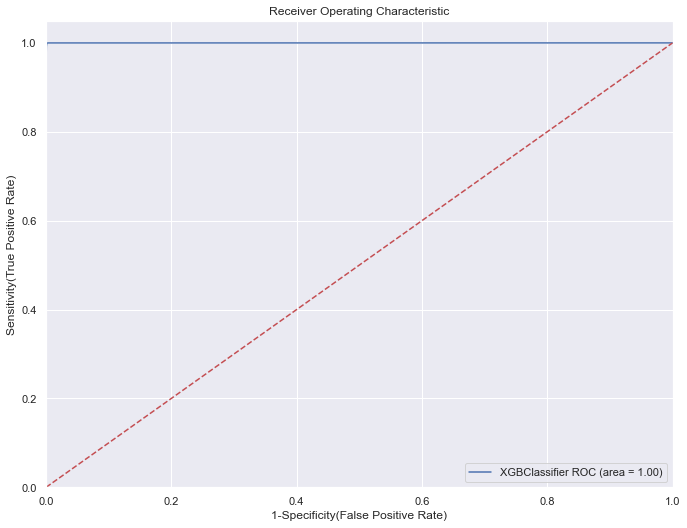

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.98      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      0.99   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8839766   13909]
 [    483 8853192]]
Confusion Matrix - Testing
[[3788345    5977]
 [     43  315251]]




In [32]:
from sklearn import metrics
for name, model  in clfs:
    print(name)
    model.fit(X_train_ROS, Y_train_ROS) # Change this for Imbalance Data Handling
    y_pred_train_ROS = model.predict(X_train_ROS)
    y_pred_ROS = model.predict(X_test)
    # Compute False postive rate, and True positive rate
    print('Accuracy', accuracy_score(Y_test,y_pred_ROS))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,y_pred_ROS)
    # Now, plot the computed values
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   
    
    print('Classification Report - Training')
    print(classification_report(Y_train_ROS,y_pred_train_ROS))
    print('Classification Report - Testing')
    print(classification_report(Y_test,y_pred_ROS))

    print('Confusion Matrix - Training')
    print(confusion_matrix(Y_train_ROS,y_pred_train_ROS))
    print('Confusion Matrix - Testing')
    print(confusion_matrix(Y_test,y_pred_ROS))
    print('\n')

### Showing All Evalution Metrics With Imbalance Data Handling - SMOTE

LogReg


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9600220555886487


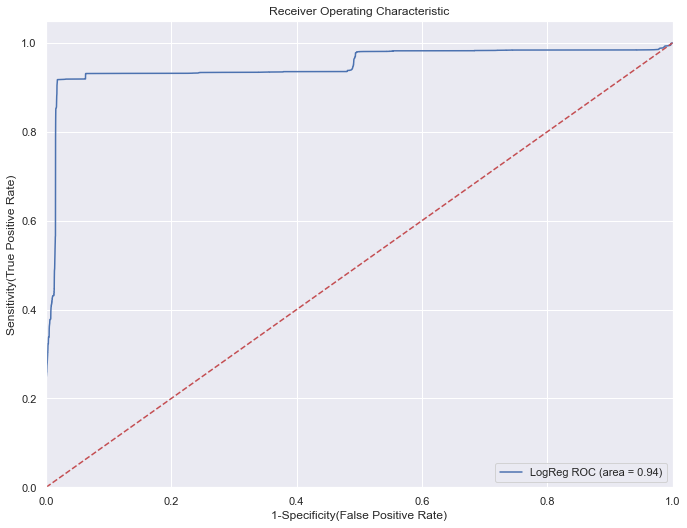

Classification Report - Training
              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94   8853675
         1.0       0.96      0.92      0.94   8853675

    accuracy                           0.94  17707350
   macro avg       0.94      0.94      0.94  17707350
weighted avg       0.94      0.94      0.94  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98   3794322
         1.0       0.68      0.92      0.78    315294

    accuracy                           0.96   4109616
   macro avg       0.83      0.94      0.88   4109616
weighted avg       0.97      0.96      0.96   4109616

Confusion Matrix - Training
[[8531057  322618]
 [ 716638 8137037]]
Confusion Matrix - Testing
[[3655701  138621]
 [  25673  289621]]


DecisionTreeClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9988716707351734


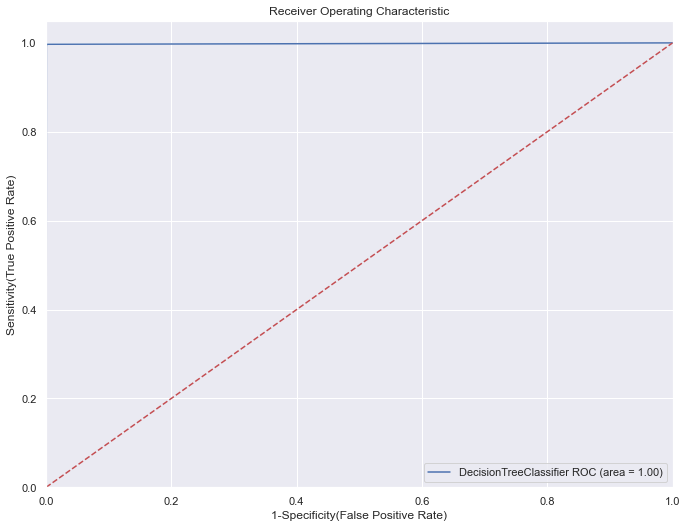

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8846474    7201]
 [     76 8853599]]
Confusion Matrix - Testing
[[3790655    3667]
 [    970  314324]]


RandomForestClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9988461209027802


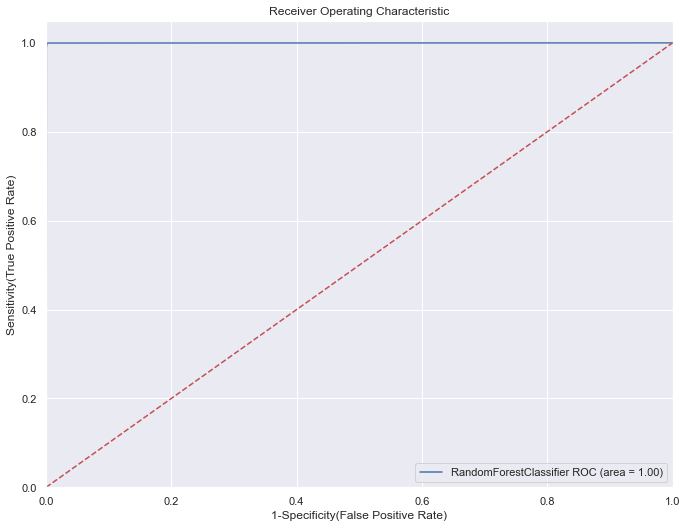

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.99      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8846473    7202]
 [     76 8853599]]
Confusion Matrix - Testing
[[3790533    3789]
 [    953  314341]]


GradientBoostingClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Accuracy 0.9924370062799055


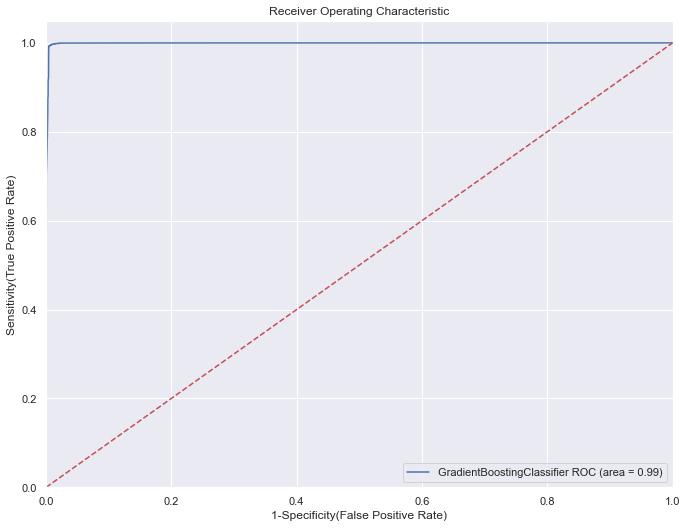

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99   8853675
         1.0       0.99      1.00      0.99   8853675

    accuracy                           0.99  17707350
   macro avg       0.99      0.99      0.99  17707350
weighted avg       0.99      0.99      0.99  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00   3794322
         1.0       0.91      1.00      0.95    315294

    accuracy                           0.99   4109616
   macro avg       0.96      0.99      0.97   4109616
weighted avg       0.99      0.99      0.99   4109616

Confusion Matrix - Training
[[8783976   69699]
 [  34226 8819449]]
Confusion Matrix - Testing
[[3764481   29841]
 [   1240  314054]]


XGBClassifier


C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9985762660063616


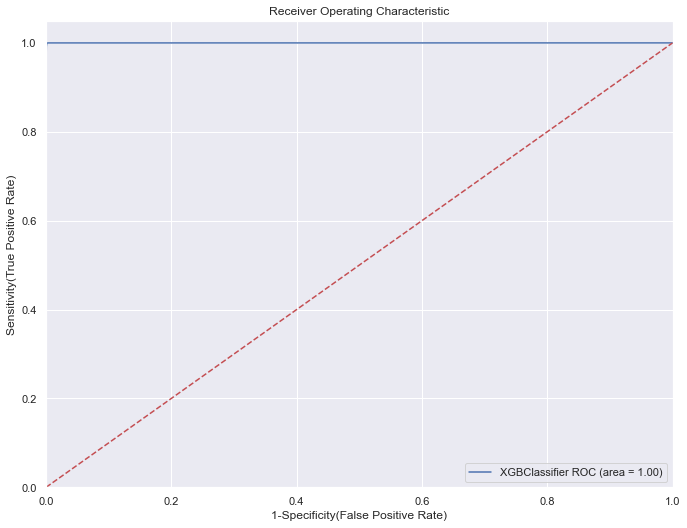

Classification Report - Training
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   8853675
         1.0       1.00      1.00      1.00   8853675

    accuracy                           1.00  17707350
   macro avg       1.00      1.00      1.00  17707350
weighted avg       1.00      1.00      1.00  17707350

Classification Report - Testing
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   3794322
         1.0       0.98      1.00      0.99    315294

    accuracy                           1.00   4109616
   macro avg       0.99      1.00      1.00   4109616
weighted avg       1.00      1.00      1.00   4109616

Confusion Matrix - Training
[[8840060   13615]
 [    461 8853214]]
Confusion Matrix - Testing
[[3788495    5827]
 [     24  315270]]




In [33]:
from sklearn import metrics
for name, model  in clfs:
    print(name)
    model.fit(X_train_SMOTE, Y_train_SMOTE) # Change this for Imbalance Data Handling
    y_pred_train_SMOTE = model.predict(X_train_SMOTE)
    y_pred_SMOTE = model.predict(X_test)
    # Compute False postive rate, and True positive rate
    print('Accuracy', accuracy_score(Y_test,y_pred_SMOTE))
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(Y_test,y_pred_SMOTE)
    # Now, plot the computed values
    plt.rcParams["figure.figsize"] = (10, 8)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
    # Custom settings for the plot 
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity(False Positive Rate)')
    plt.ylabel('Sensitivity(True Positive Rate)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()   
    
    print('Classification Report - Training')
    print(classification_report(Y_train_SMOTE,y_pred_train_SMOTE))
    print('Classification Report - Testing')
    print(classification_report(Y_test,y_pred_SMOTE))

    print('Confusion Matrix - Training')
    print(confusion_matrix(Y_train_SMOTE,y_pred_train_SMOTE))
    print('Confusion Matrix - Testing')
    print(confusion_matrix(Y_test,y_pred_SMOTE))
    print('\n')

### Feature Importance : Features /Predictor that caused failures

#### Without Imbalance Handling

##### Which features cause to create a job as failed.

In [34]:
model = XGBClassifier()
model.fit(X_train, Y_train)

C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:49:57] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='approx', validate_parameters=1, verbosity=None)

In [36]:
features_columns = ['collection_id', 'priority', 'resource_request.cpus', 'resource_request.memory', 'collection_type', 'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage', 'power_consumption']
sorted_idx = np.argsort(model.feature_importances_)[::-1]
# Then, it is time to print all sorted importances and the name of columns together as lists (I assume the data loaded with Pandas)

for index in sorted_idx:
    print([features_columns[index], model.feature_importances_[index]]) 

['collection_type', 0.60673714]
['vertical_scaling', 0.31781957]
['resource_request.memory', 0.017350323]
['assigned_memory', 0.015183265]
['resource_request.cpus', 0.011528752]
['scheduler', 0.008155567]
['collection_id', 0.007944827]
['priority', 0.005973535]
['cpu_usage', 0.0050901566]
['power_consumption', 0.0042168666]


In [37]:
ft_weights = pd.DataFrame(model.feature_importances_*100, columns=['Importance'], index=features_columns)
ft_weights

,Importance
collection_id,0.794483
priority,0.597354
resource_request.cpus,1.152875
resource_request.memory,1.735032
collection_type,60.673714
vertical_scaling,31.781956
scheduler,0.815557
assigned_memory,1.518327
cpu_usage,0.509016
power_consumption,0.421687


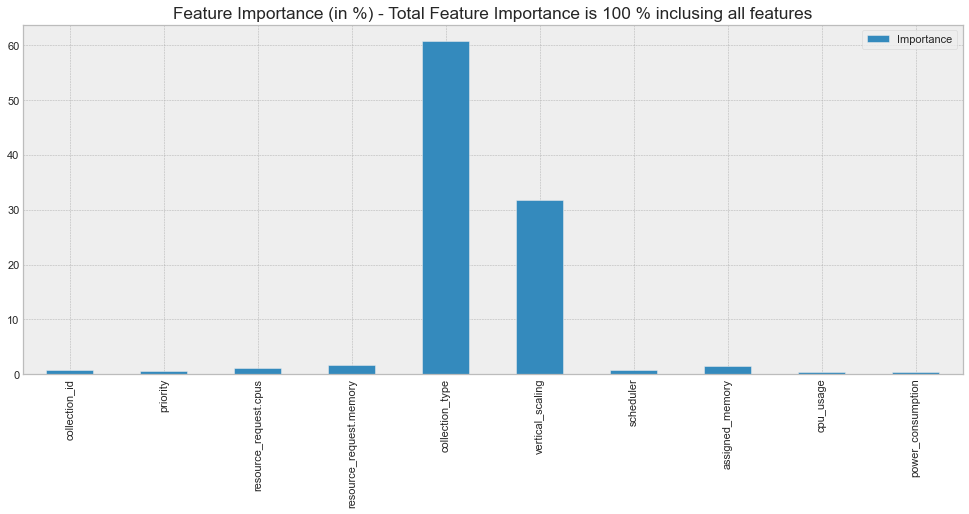

In [38]:
plt.style.use('bmh')
ft_weights.plot(kind='bar', figsize=(15,6))
plt.title('Feature Importance (in %) - Total Feature Importance is 100 % inclusing all features')
plt.show()

### The predictor importances to predict failure for all the methods (Failed and Finished)

C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


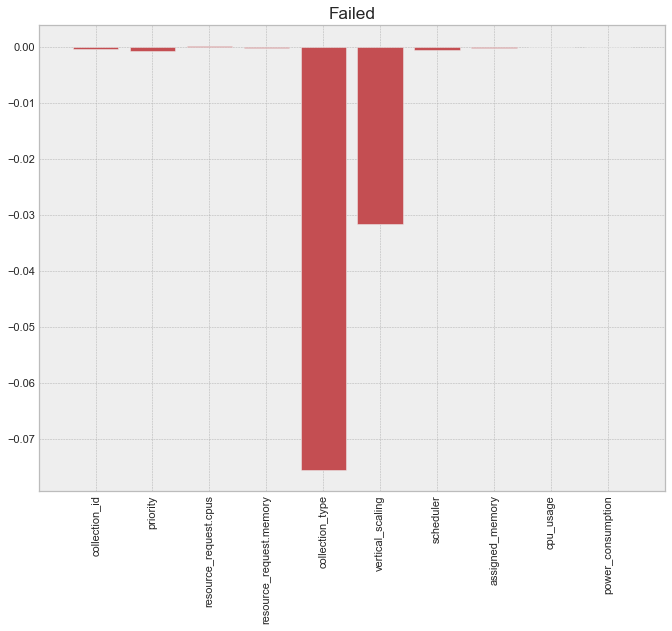

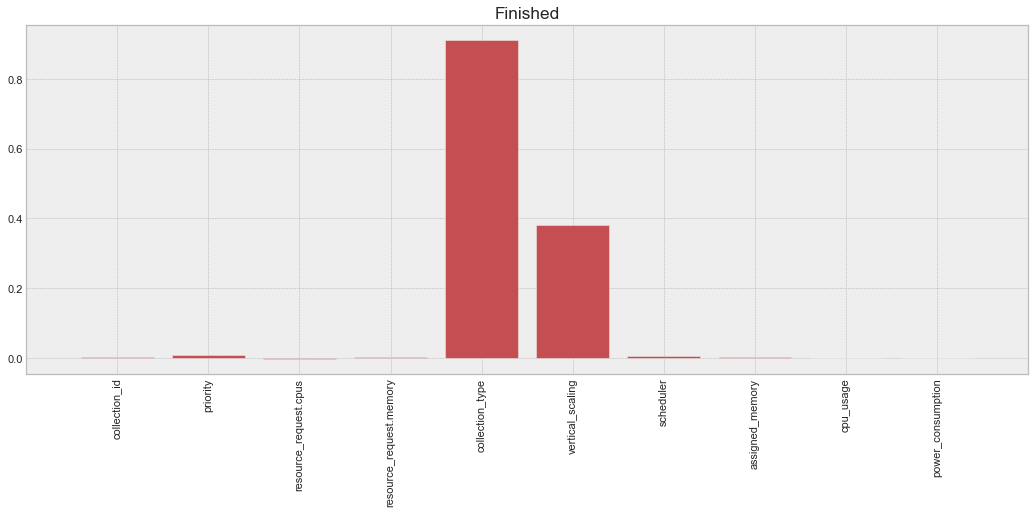

In [39]:
import json
from sklearn.preprocessing import scale

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, Y_train, model.feature_importances_)

# Plot the feature importances of the forest
ff = np.array(features_columns)


titles = ["Failed", "Finished"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

###### Power Consumption is the most possible feature which creates a submission to be failed without considering other features.

#### With Imbalance Handling - Random Undersampling

In [40]:
#take which classifier is the best
model_RUS = XGBClassifier()
model_RUS.fit(X_train_RUS, Y_train_RUS) # Change based on imbalance Handling

C:\Users\luqsa\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:34:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
features_columns = ['collection_id', 'priority', 'resource_request.cpus', 'resource_request.memory', 'collection_type', 'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage', 'power_consumption']
sorted_idx = np.argsort(model_RUS.feature_importances_)[::-1]
# Then, it is time to print all sorted importances and the name of columns together as lists (I assume the data loaded with Pandas)

for index in sorted_idx:
    print([features_columns[index], model_RUS.feature_importances_[index]]) 

['vertical_scaling', 0.6611483]
['priority', 0.23347418]
['resource_request.memory', 0.031274106]
['assigned_memory', 0.021312904]
['resource_request.cpus', 0.020605454]
['collection_type', 0.018823422]
['collection_id', 0.009056344]
['cpu_usage', 0.0035029214]
['scheduler', 0.0008023057]
['power_consumption', 0.0]


In [43]:
ft_weights = pd.DataFrame(model_RUS.feature_importances_*100, columns=['Importance'], index=features_columns)
ft_weights

,Importance
collection_id,0.905634
priority,23.347418
resource_request.cpus,2.060545
resource_request.memory,3.127411
collection_type,1.882342
vertical_scaling,66.114830
scheduler,0.080231
assigned_memory,2.131290
cpu_usage,0.350292
power_consumption,0.000000


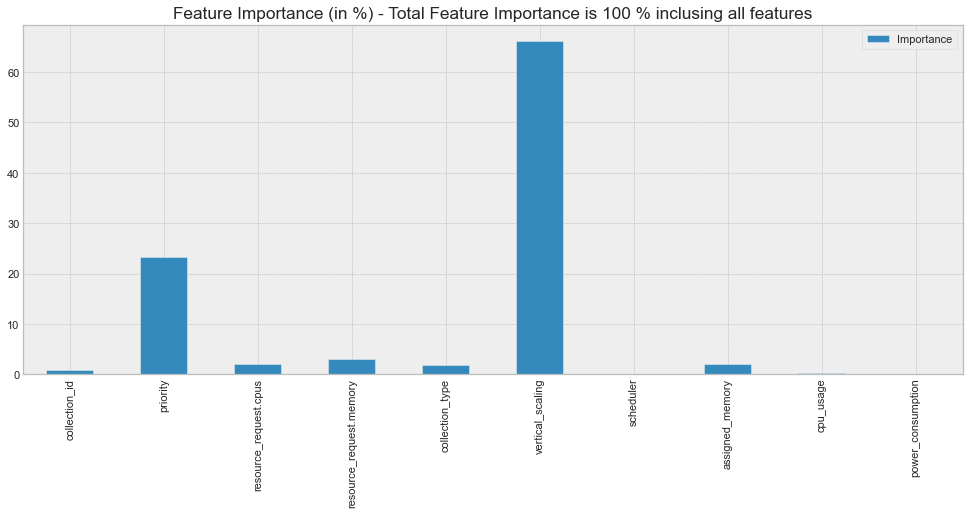

In [44]:
plt.style.use('bmh')
ft_weights.plot(kind='bar', figsize=(15,6))
plt.title('Feature Importance (in %) - Total Feature Importance is 100 % inclusing all features')
plt.show()

### The predictor importances to predict failure for all the methods (Failed and Finished)

C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


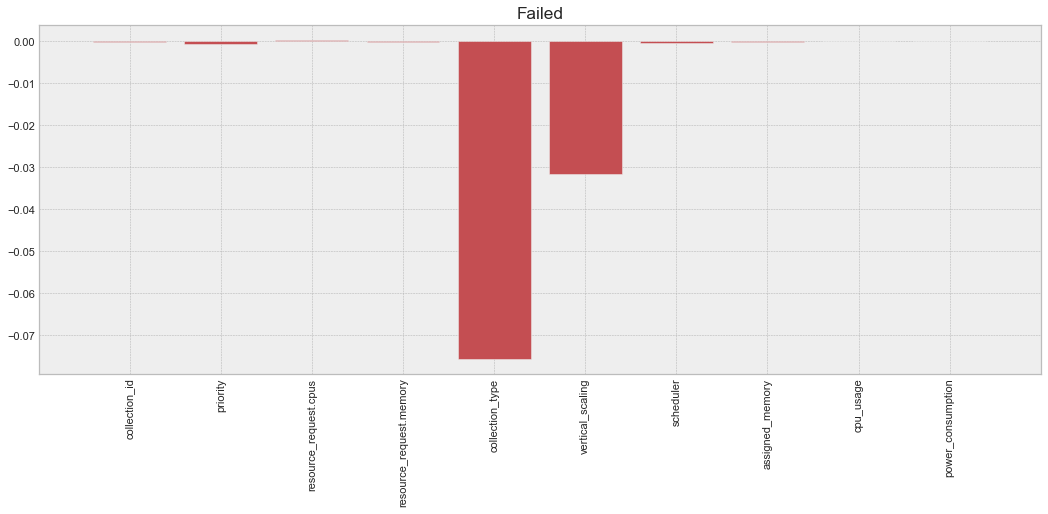

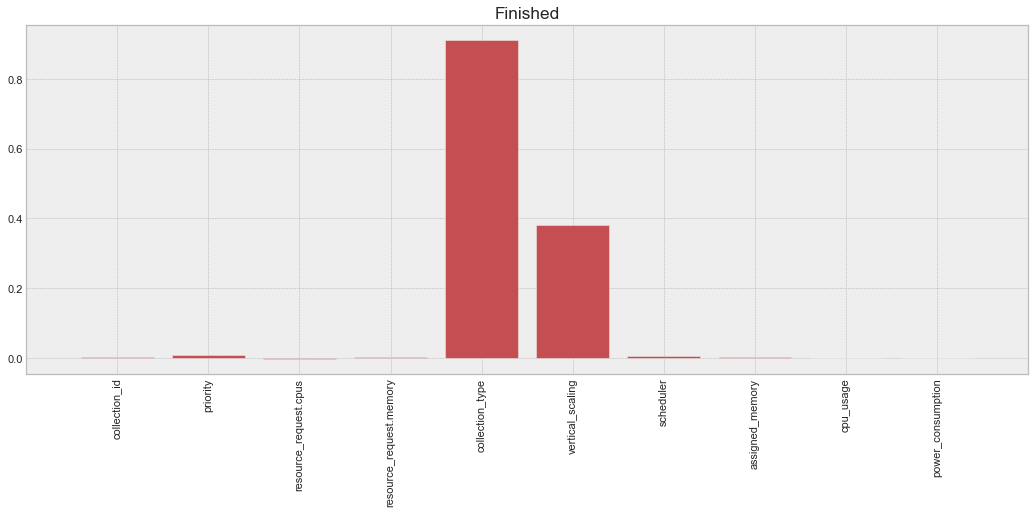

In [45]:
import json
from sklearn.preprocessing import scale

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, Y_train, model.feature_importances_)

# Plot the feature importances of the forest
ff = np.array(features_columns)


titles = ["Failed", "Finished"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

#### With Imbalance Handling - Random Oversampling

In [46]:
#take which classifier is the best
model_ROS = DecisionTreeClassifier()
model_ROS.fit(X_train_ROS, Y_train_ROS) # Change based on imbalance Handling

DecisionTreeClassifier()

In [47]:
features_columns = ['collection_id', 'priority', 'resource_request.cpus', 'resource_request.memory', 'collection_type', 'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage', 'power_consumption']
sorted_idx = np.argsort(model_ROS.feature_importances_)[::-1]
# Then, it is time to print all sorted importances and the name of columns together as lists (I assume the data loaded with Pandas)

for index in sorted_idx:
    print([features_columns[index], model_ROS.feature_importances_[index]]) 

['vertical_scaling', 0.5225679177833088]
['priority', 0.2965198325654444]
['resource_request.memory', 0.06601230295932682]
['resource_request.cpus', 0.03931341036048985]
['assigned_memory', 0.0392558900131762]
['collection_id', 0.03417643457663813]
['collection_type', 0.0018378267280513506]
['cpu_usage', 0.00026052065995506285]
['scheduler', 3.4730965447777314e-05]
['power_consumption', 2.1133388161516647e-05]


In [48]:
ft_weights = pd.DataFrame(model.feature_importances_*100, columns=['Importance'], index=features_columns)
ft_weights

,Importance
collection_id,0.794483
priority,0.597354
resource_request.cpus,1.152875
resource_request.memory,1.735032
collection_type,60.673714
vertical_scaling,31.781956
scheduler,0.815557
assigned_memory,1.518327
cpu_usage,0.509016
power_consumption,0.421687


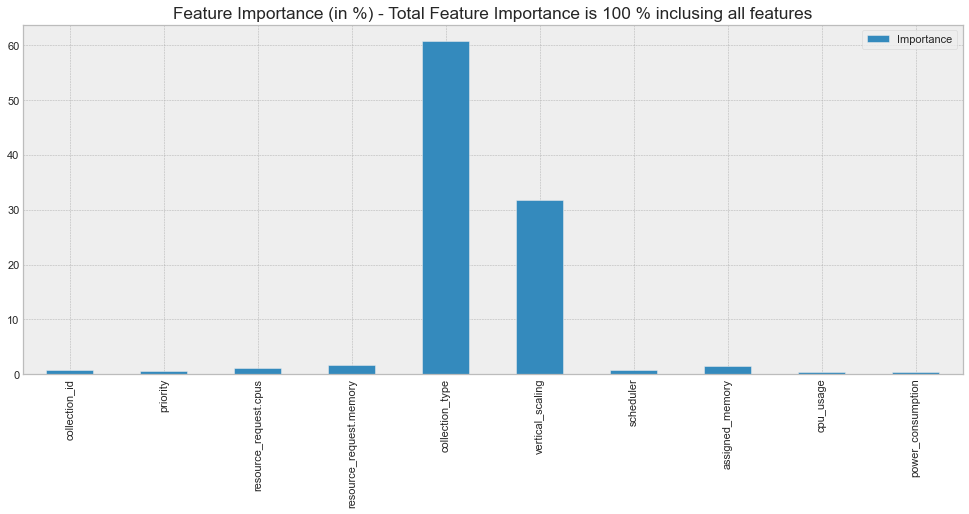

In [49]:
plt.style.use('bmh')
ft_weights.plot(kind='bar', figsize=(15,6))
plt.title('Feature Importance (in %) - Total Feature Importance is 100 % inclusing all features')
plt.show()

### The predictor importances to predict failure for all the methods (Failed and Finished)

C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


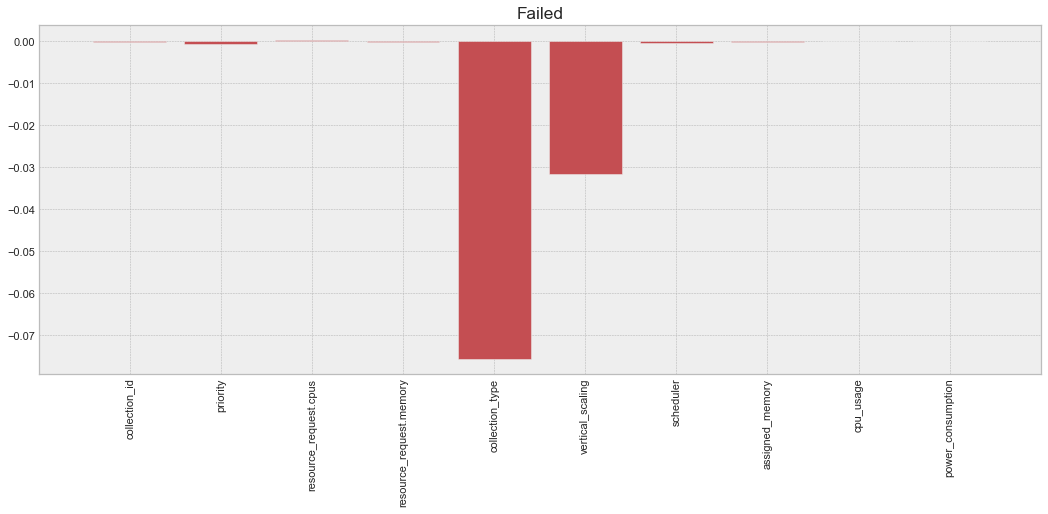

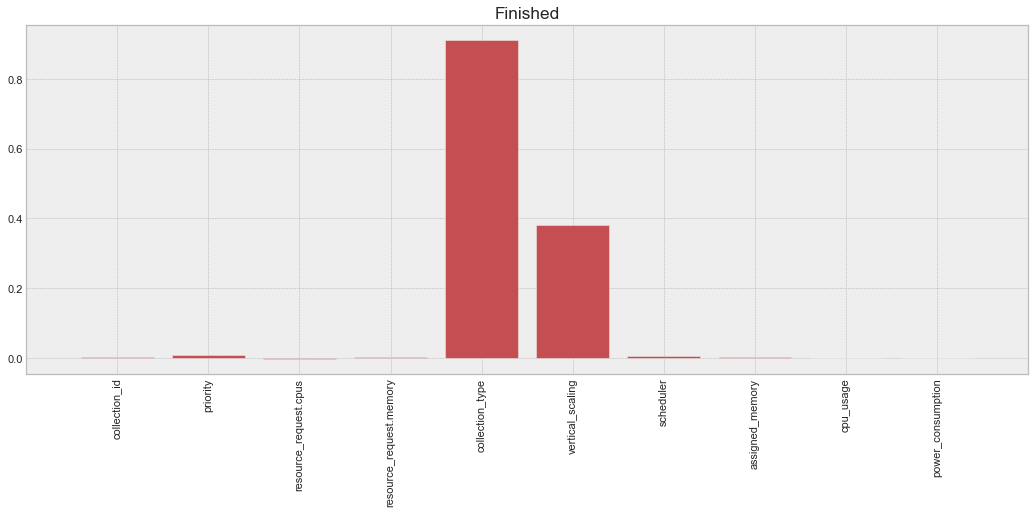

In [50]:
import json
from sklearn.preprocessing import scale

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, Y_train, model.feature_importances_)

# Plot the feature importances of the forest
ff = np.array(features_columns)


titles = ["Failed", "Finished"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

#### With Imbalance Handling - SMOTE

In [51]:
from xgboost import plot_importance #take which classifier is the best
model_SMOTE = DecisionTreeClassifier()
model_SMOTE.fit(X_train_SMOTE, Y_train_SMOTE) # Change based on imbalance Handling

DecisionTreeClassifier()

In [52]:
features_columns = ['collection_id', 'priority', 'resource_request.cpus', 'resource_request.memory', 'collection_type', 'vertical_scaling', 'scheduler', 'assigned_memory', 'cpu_usage', 'power_consumption']
sorted_idx = np.argsort(model_SMOTE.feature_importances_)[::-1]
# Then, it is time to print all sorted importances and the name of columns together as lists (I assume the data loaded with Pandas)

for index in sorted_idx:
    print([features_columns[index], model_SMOTE.feature_importances_[index]]) 

['vertical_scaling', 0.5224162239655405]
['priority', 0.29650868522632895]
['resource_request.memory', 0.06770123610479536]
['assigned_memory', 0.03909080263329114]
['resource_request.cpus', 0.03794192160712173]
['collection_id', 0.0341597096950832]
['collection_type', 0.001857498178610246]
['power_consumption', 0.00020845024820487866]
['cpu_usage', 8.329703635171042e-05]
['scheduler', 3.217530467231641e-05]


In [53]:
ft_weights = pd.DataFrame(model.feature_importances_*100, columns=['Importance'], index=features_columns)
ft_weights

,Importance
collection_id,0.794483
priority,0.597354
resource_request.cpus,1.152875
resource_request.memory,1.735032
collection_type,60.673714
vertical_scaling,31.781956
scheduler,0.815557
assigned_memory,1.518327
cpu_usage,0.509016
power_consumption,0.421687


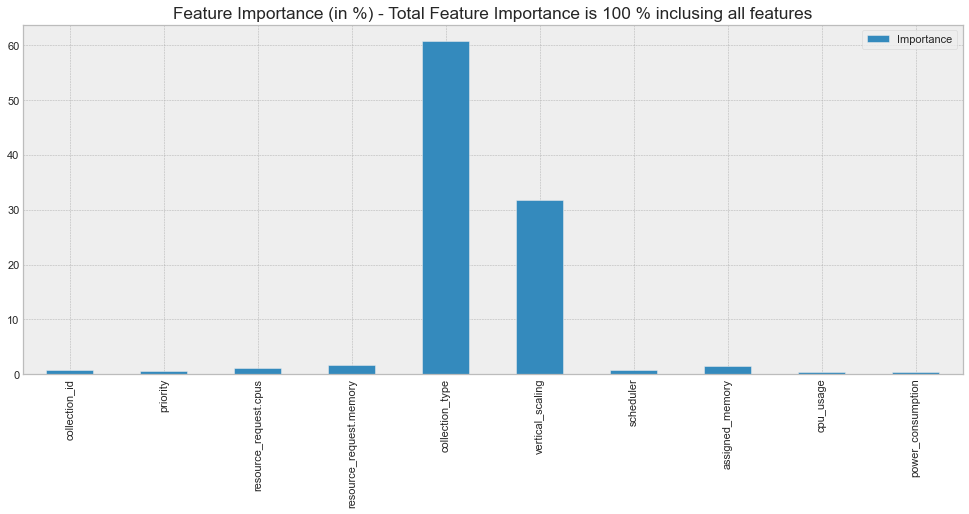

In [54]:
plt.style.use('bmh')
ft_weights.plot(kind='bar', figsize=(15,6))
plt.title('Feature Importance (in %) - Total Feature Importance is 100 % inclusing all features')
plt.show()

### The predictor importances to predict failure for all the methods (Failed and Finished)

C:\Users\luqsa\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


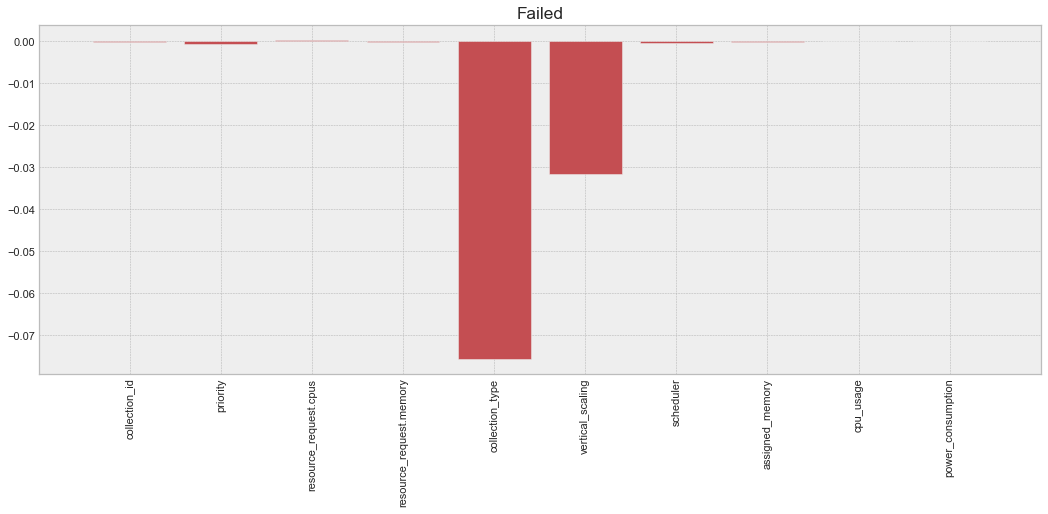

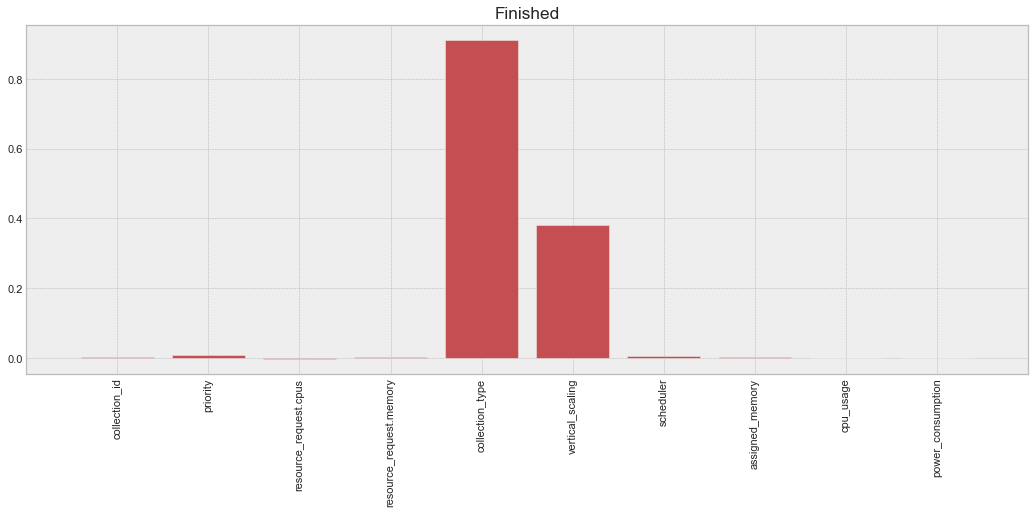

In [55]:
import json
from sklearn.preprocessing import scale

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X_train, Y_train, model.feature_importances_)

# Plot the feature importances of the forest
ff = np.array(features_columns)


titles = ["Failed", "Finished"]
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

## Deep Learning Models

In [34]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.recurrent import LSTM, GRU
import sklearn.metrics as metrics
import tensorflow as tf

In [35]:
Y_train.shape

(10976816,)

In [36]:
Y_test.shape

(4704350,)

## LSTM

### Without Imbalanced Handling

In [37]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = Y_train
y_test = Y_test

Epoch 1/100
5360/5360 [==============================] - 677s 124ms/step - loss: 0.2688 - accuracy: 0.9306 - val_loss: 0.2515 - val_accuracy: 0.9310
Epoch 2/100
5360/5360 [==============================] - 657s 122ms/step - loss: 0.2523 - accuracy: 0.9310 - val_loss: 0.2490 - val_accuracy: 0.9310
Epoch 3/100
5360/5360 [==============================] - 663s 124ms/step - loss: 0.2417 - accuracy: 0.9310 - val_loss: 0.2248 - val_accuracy: 0.9310
Epoch 4/100
5360/5360 [==============================] - 660s 123ms/step - loss: 0.2196 - accuracy: 0.9322 - val_loss: 0.2044 - val_accuracy: 0.9415
Epoch 5/100
5360/5360 [==============================] - 656s 122ms/step - loss: 0.1735 - accuracy: 0.9382 - val_loss: 0.1071 - val_accuracy: 0.9483
Epoch 6/100
5360/5360 [==============================] - 661s 123ms/step - loss: 0.0936 - accuracy: 0.9673 - val_loss: 0.0735 - val_accuracy: 0.9802
Epoch 7/100
5360/5360 [==============================] - 676s 126ms/step - loss: 0.0787 - accuracy: 0.9769

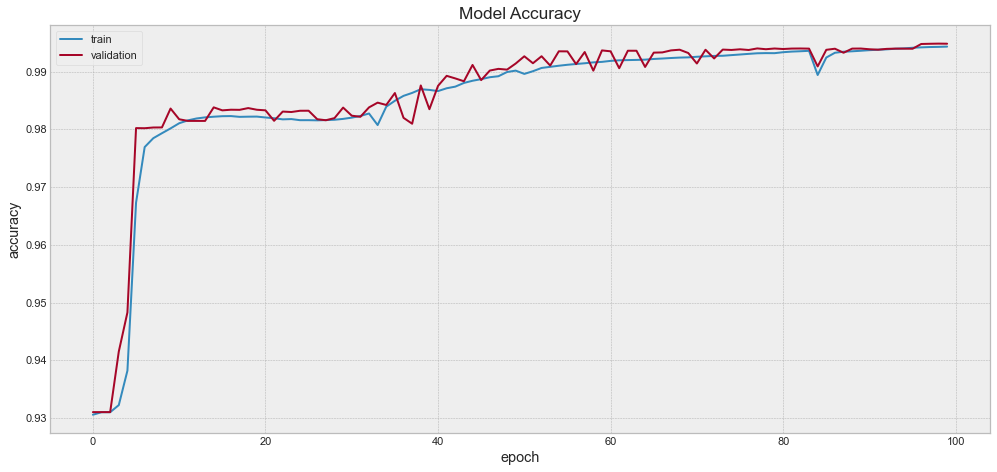

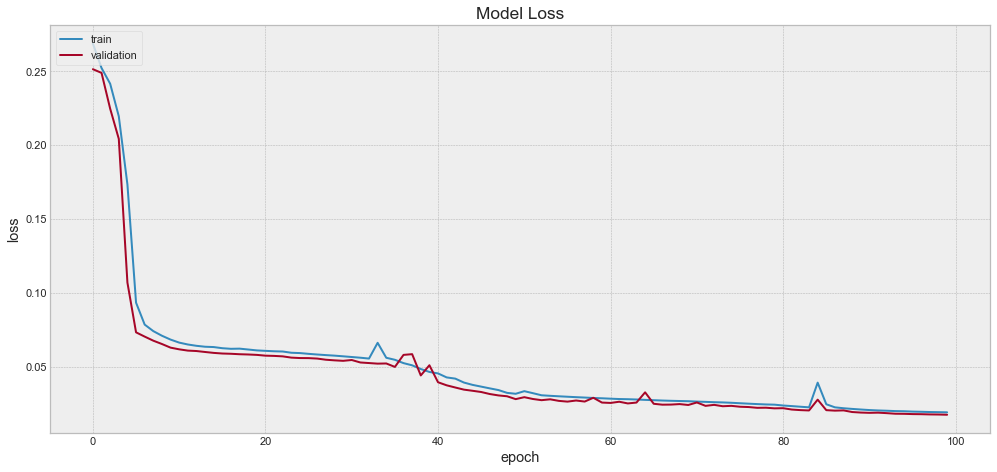

Accuracy: 0.9943191409111023
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           66560     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)             

In [38]:
model_without = models.Sequential()
model_without.add(LSTM(128, input_shape=(X_train.shape[1], 1), return_sequences=True, unroll=True))
model_without.add(Dropout(0.4))
model_without.add(LSTM(64, return_sequences = True))
model_without.add(Dropout(0.4))
model_without.add(LSTM(32))
model_without.add(Dropout(0.4))
model_without.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_without.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_without = model_without.fit(x_train, y_train, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test, y_test))

predictions_without = model_without.predict(x_test)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_without.history['accuracy'])
plt.plot(history_without.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_without.history['loss'])
plt.plot(history_without.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_without.history['accuracy'][-1])

model_without.summary()
              
model_without.save("LSTM_Without.keras")

### With Imbalanced Handling - Using RUS

In [39]:
x_train_RUS = X_train_RUS.reshape(X_train_RUS.shape[0], X_train_RUS.shape[1], 1)
x_test_RUS = X_test_RUS.reshape(X_test_RUS.shape[0], X_test_RUS.shape[1], 1)

y_train_RUS = Y_train_RUS
y_test_RUS = Y_test_RUS

Epoch 1/100
740/740 [==============================] - 98s 122ms/step - loss: 0.6923 - accuracy: 0.5084 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 2/100
740/740 [==============================] - 89s 120ms/step - loss: 0.6904 - accuracy: 0.5385 - val_loss: 0.6891 - val_accuracy: 0.5000
Epoch 3/100
740/740 [==============================] - 90s 122ms/step - loss: 0.6879 - accuracy: 0.5708 - val_loss: 0.6856 - val_accuracy: 0.4940
Epoch 4/100
740/740 [==============================] - 89s 121ms/step - loss: 0.6833 - accuracy: 0.6045 - val_loss: 0.6786 - val_accuracy: 0.7498
Epoch 5/100
740/740 [==============================] - 89s 120ms/step - loss: 0.6730 - accuracy: 0.6458 - val_loss: 0.6621 - val_accuracy: 0.6956
Epoch 6/100
740/740 [==============================] - 89s 121ms/step - loss: 0.6492 - accuracy: 0.6569 - val_loss: 0.6277 - val_accuracy: 0.6712
Epoch 7/100
740/740 [==============================] - 89s 121ms/step - loss: 0.6172 - accuracy: 0.6681 - val_loss: 0.5976 -

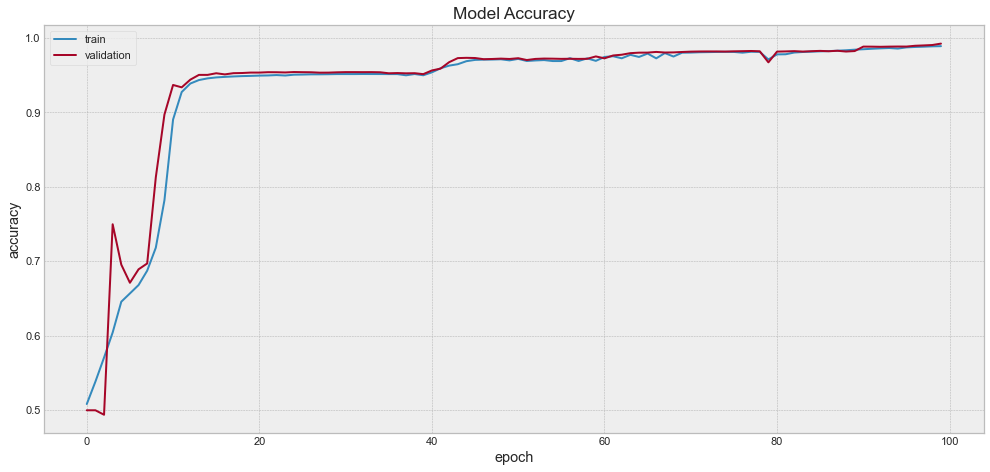

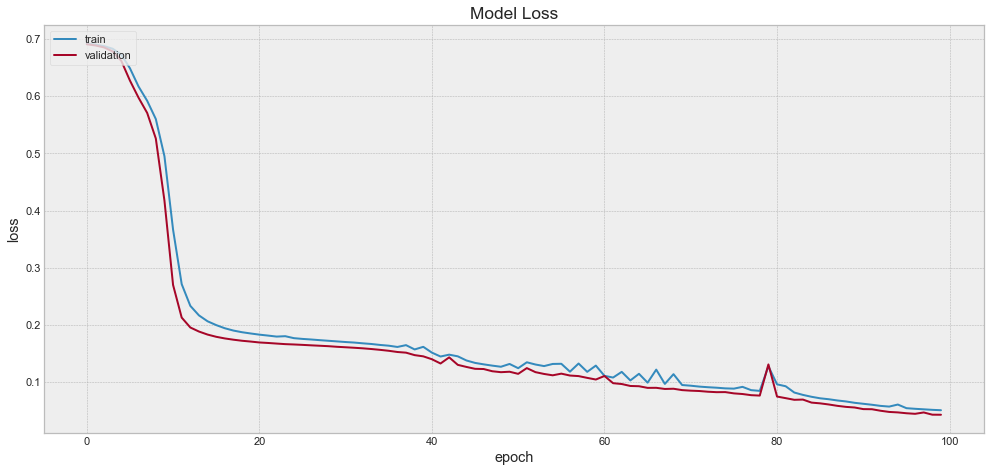

Accuracy: 0.9889397621154785
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10, 128)           66560     
                                                                 
 dropout_3 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_4 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_4 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)         

In [40]:
model_RUS = models.Sequential()
model_RUS.add(LSTM(128, input_shape=(X_train_RUS.shape[1], 1), return_sequences=True, unroll=True))
model_RUS.add(Dropout(0.4))
model_RUS.add(LSTM(64, return_sequences = True))
model_RUS.add(Dropout(0.4))
model_RUS.add(LSTM(32))
model_RUS.add(Dropout(0.4))
model_RUS.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_RUS.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_RUS = model_RUS.fit(x_train_RUS, y_train_RUS, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_RUS, y_test_RUS))

predictions_RUS = model_RUS.predict(x_test_RUS)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_RUS.history['accuracy'])
plt.plot(history_RUS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_RUS.history['loss'])
plt.plot(history_RUS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_RUS.history['accuracy'][-1])

model_RUS.summary()
              
model_RUS.save("LSTM_RUS.keras")

### With Imbalanced Handling - Using ROS

In [41]:
x_train_ROS = X_train_ROS.reshape(X_train_ROS.shape[0], X_train_ROS.shape[1], 1)
x_test_ROS = X_test_ROS.reshape(X_test_ROS.shape[0], X_test_ROS.shape[1], 1)

y_train_ROS = Y_train_ROS
y_test_ROS = Y_test_ROS

Epoch 1/100
9980/9980 [==============================] - 1219s 121ms/step - loss: 0.5717 - accuracy: 0.6944 - val_loss: 0.2008 - val_accuracy: 0.9451
Epoch 2/100
9980/9980 [==============================] - 1210s 121ms/step - loss: 0.1866 - accuracy: 0.9501 - val_loss: 0.1642 - val_accuracy: 0.9535
Epoch 3/100
9980/9980 [==============================] - 1203s 121ms/step - loss: 0.1674 - accuracy: 0.9518 - val_loss: 0.1497 - val_accuracy: 0.9529
Epoch 4/100
9980/9980 [==============================] - 1208s 121ms/step - loss: 0.1491 - accuracy: 0.9619 - val_loss: 0.1298 - val_accuracy: 0.9701
Epoch 5/100
9980/9980 [==============================] - 1207s 121ms/step - loss: 0.1309 - accuracy: 0.9706 - val_loss: 0.1121 - val_accuracy: 0.9727
Epoch 6/100
9980/9980 [==============================] - 1210s 121ms/step - loss: 0.1210 - accuracy: 0.9725 - val_loss: 0.1066 - val_accuracy: 0.9764
Epoch 7/100
9980/9980 [==============================] - 1206s 121ms/step - loss: 0.1051 - accuracy:

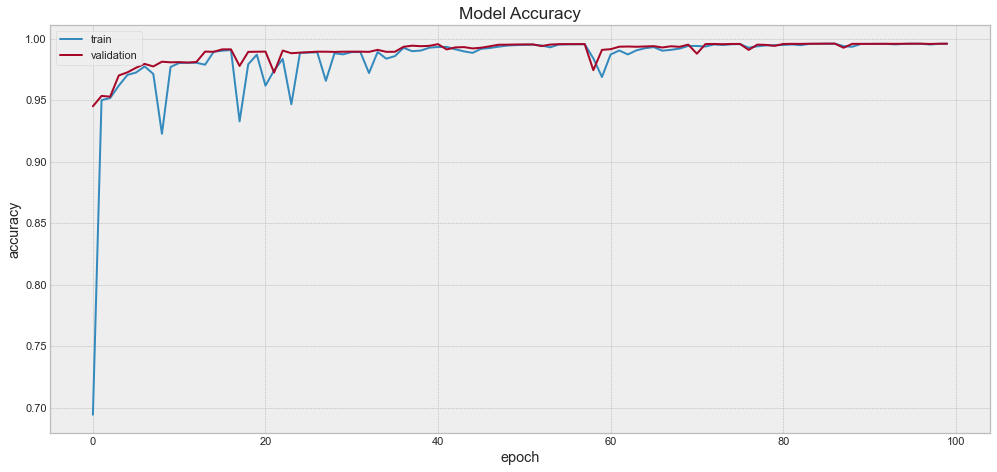

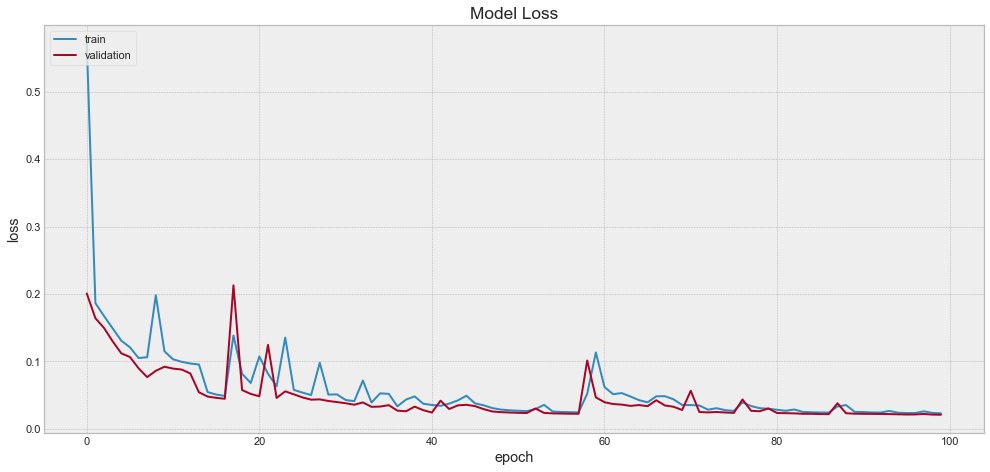

Accuracy: 0.995918869972229
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 128)           66560     
                                                                 
 dropout_6 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 64)            49408     
                                                                 
 dropout_7 (Dropout)         (None, 10, 64)            0         
                                                                 
 lstm_8 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)          

In [42]:
model_ROS = models.Sequential()
model_ROS.add(LSTM(128, input_shape=(X_train_ROS.shape[1], 1), return_sequences=True, unroll=True))
model_ROS.add(Dropout(0.4))
model_ROS.add(LSTM(64, return_sequences = True))
model_ROS.add(Dropout(0.4))
model_ROS.add(LSTM(32))
model_ROS.add(Dropout(0.4))
model_ROS.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_ROS.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_ROS = model_ROS.fit(x_train_ROS, y_train_ROS, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_ROS, y_test_ROS))

predictions_ROS = model_ROS.predict(x_test_ROS)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_ROS.history['accuracy'])
plt.plot(history_ROS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_ROS.history['loss'])
plt.plot(history_ROS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_ROS.history['accuracy'][-1])

model_ROS.summary()
              
model_ROS.save("LSTM_ROS.keras")

### With Imbalanced Handling - Using SMOTE

In [43]:
x_train_SMOTE = X_train_SMOTE.reshape(X_train_SMOTE.shape[0], X_train_SMOTE.shape[1], 1)
x_test_SMOTE = X_test_SMOTE.reshape(X_test_SMOTE.shape[0], X_test_SMOTE.shape[1], 1)

y_train_SMOTE = Y_train_SMOTE
y_test_SMOTE = Y_test_SMOTE

Epoch 1/100
9980/9980 [==============================] - 1212s 121ms/step - loss: 0.5388 - accuracy: 0.7169 - val_loss: 0.1889 - val_accuracy: 0.9500
Epoch 2/100
9980/9980 [==============================] - 1198s 120ms/step - loss: 0.1832 - accuracy: 0.9505 - val_loss: 0.1622 - val_accuracy: 0.9542
Epoch 3/100
9980/9980 [==============================] - 1202s 120ms/step - loss: 0.1587 - accuracy: 0.9543 - val_loss: 0.1503 - val_accuracy: 0.9485
Epoch 4/100
9980/9980 [==============================] - 1197s 120ms/step - loss: 0.1301 - accuracy: 0.9708 - val_loss: 0.1141 - val_accuracy: 0.9743
Epoch 5/100
9980/9980 [==============================] - 1202s 120ms/step - loss: 0.1198 - accuracy: 0.9735 - val_loss: 0.1033 - val_accuracy: 0.9772
Epoch 6/100
9980/9980 [==============================] - 1196s 120ms/step - loss: 0.1064 - accuracy: 0.9774 - val_loss: 0.0938 - val_accuracy: 0.9791
Epoch 7/100
9980/9980 [==============================] - 1201s 120ms/step - loss: 0.0973 - accuracy:

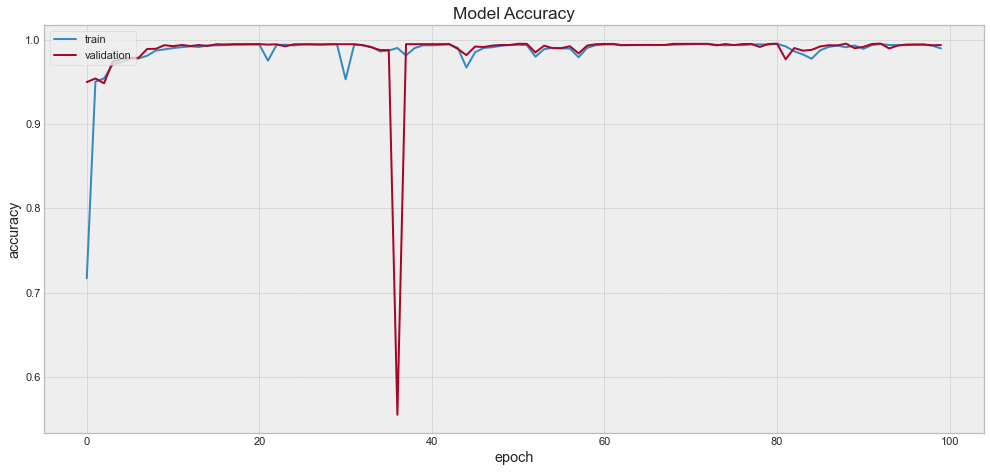

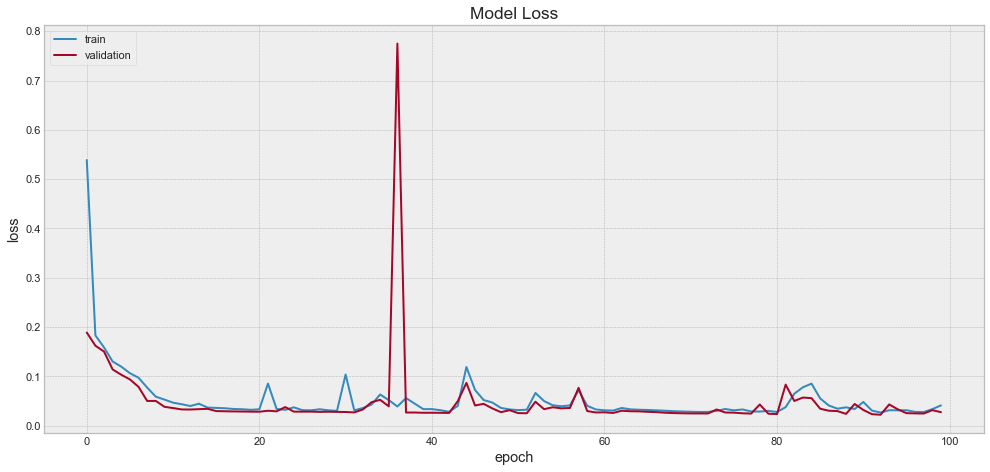

Accuracy: 0.9899265170097351
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 10, 128)           66560     
                                                                 
 dropout_9 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_10 (LSTM)              (None, 10, 64)            49408     
                                                                 
 dropout_10 (Dropout)        (None, 10, 64)            0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)         

In [44]:
model_SMOTE = models.Sequential()
model_SMOTE.add(LSTM(128, input_shape=(X_train_SMOTE.shape[1], 1), return_sequences=True, unroll=True))
model_SMOTE.add(Dropout(0.4))
model_SMOTE.add(LSTM(64, return_sequences = True))
model_SMOTE.add(Dropout(0.4))
model_SMOTE.add(LSTM(32))
model_SMOTE.add(Dropout(0.4))
model_SMOTE.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_SMOTE.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_SMOTE = model_SMOTE.fit(x_train_SMOTE, y_train_SMOTE, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_SMOTE, y_test_SMOTE))

predictions_SMOTE = model_SMOTE.predict(x_test_SMOTE)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_SMOTE.history['accuracy'])
plt.plot(history_SMOTE.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_SMOTE.history['loss'])
plt.plot(history_SMOTE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_SMOTE.history['accuracy'][-1])

model_SMOTE.summary()
              
model_SMOTE.save("LSTM_SMOTE.keras")

## Gated Recurrent Unit (GRU)

### Without Imbalanced Handling

In [37]:
x_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

y_train = Y_train
y_test = Y_test

Epoch 1/100
5360/5360 [==============================] - 551s 101ms/step - loss: 0.2637 - accuracy: 0.9305 - val_loss: 0.2415 - val_accuracy: 0.9310
Epoch 2/100
5360/5360 [==============================] - 529s 99ms/step - loss: 0.2116 - accuracy: 0.9303 - val_loss: 0.1690 - val_accuracy: 0.9315
Epoch 3/100
5360/5360 [==============================] - 537s 100ms/step - loss: 0.1409 - accuracy: 0.9397 - val_loss: 0.1023 - val_accuracy: 0.9748
Epoch 4/100
5360/5360 [==============================] - 534s 100ms/step - loss: 0.1040 - accuracy: 0.9638 - val_loss: 0.0834 - val_accuracy: 0.9788
Epoch 5/100
5360/5360 [==============================] - 534s 100ms/step - loss: 0.0904 - accuracy: 0.9734 - val_loss: 0.0786 - val_accuracy: 0.9786
Epoch 6/100
5360/5360 [==============================] - 533s 100ms/step - loss: 0.0832 - accuracy: 0.9763 - val_loss: 0.0745 - val_accuracy: 0.9788
Epoch 7/100
5360/5360 [==============================] - 529s 99ms/step - loss: 0.0780 - accuracy: 0.9774 -

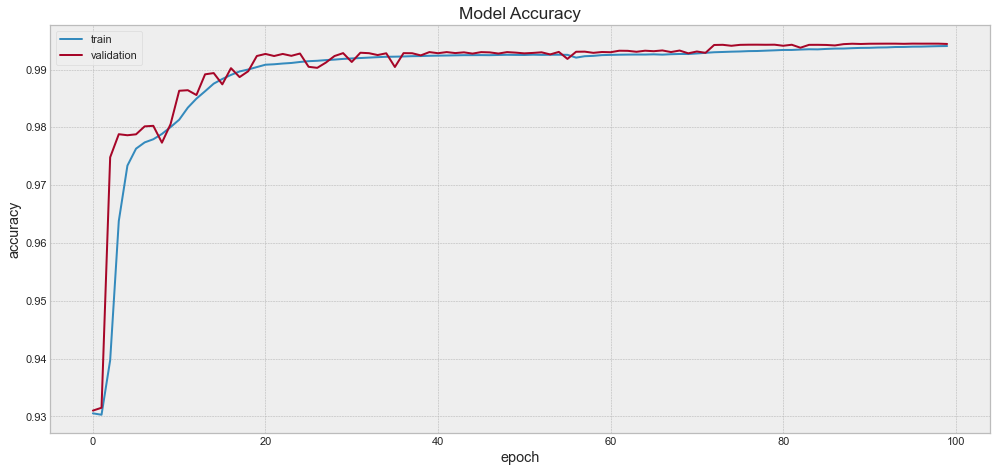

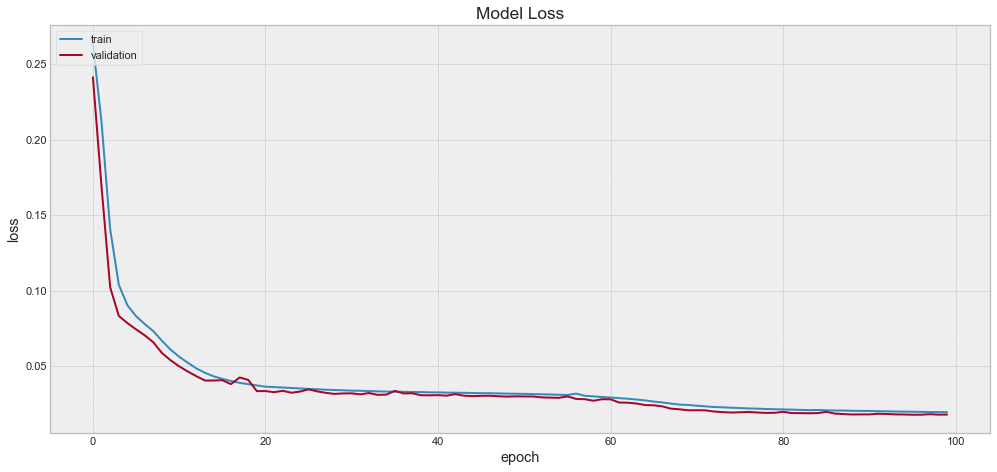

Accuracy: 0.9940646886825562
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 128)           49920     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 10, 64)            37056     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 32)                9312      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)             

In [38]:
model_GRU_without = models.Sequential()
model_GRU_without.add(GRU(128, input_shape=(X_train.shape[1], 1), return_sequences=True, unroll=True))
model_GRU_without.add(Dropout(0.4))
model_GRU_without.add(GRU(64, return_sequences = True))
model_GRU_without.add(Dropout(0.4))
model_GRU_without.add(GRU(32))
model_GRU_without.add(Dropout(0.4))
model_GRU_without.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_GRU_without.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_GRU_without = model_GRU_without.fit(x_train, y_train, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test, y_test))

predictions_GRU_without = model_GRU_without.predict(x_test)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_GRU_without.history['accuracy'])
plt.plot(history_GRU_without.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_GRU_without.history['loss'])
plt.plot(history_GRU_without.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_GRU_without.history['accuracy'][-1])

model_GRU_without.summary()
              
model_GRU_without.save("GRU_Without.keras")

### With Imbalanced Handling - Using RUS

In [39]:
x_train_RUS = X_train_RUS.reshape(X_train_RUS.shape[0], X_train_RUS.shape[1], 1)
x_test_RUS = X_test_RUS.reshape(X_test_RUS.shape[0], X_test_RUS.shape[1], 1)

y_train_RUS = Y_train_RUS
y_test_RUS = Y_test_RUS

Epoch 1/100
740/740 [==============================] - 83s 101ms/step - loss: 0.6923 - accuracy: 0.5140 - val_loss: 0.6894 - val_accuracy: 0.5000
Epoch 2/100
740/740 [==============================] - 74s 99ms/step - loss: 0.6871 - accuracy: 0.5633 - val_loss: 0.6822 - val_accuracy: 0.4940
Epoch 3/100
740/740 [==============================] - 73s 98ms/step - loss: 0.6746 - accuracy: 0.6341 - val_loss: 0.6576 - val_accuracy: 0.8109
Epoch 4/100
740/740 [==============================] - 74s 100ms/step - loss: 0.6219 - accuracy: 0.7370 - val_loss: 0.5539 - val_accuracy: 0.8162
Epoch 5/100
740/740 [==============================] - 73s 99ms/step - loss: 0.5163 - accuracy: 0.7897 - val_loss: 0.4499 - val_accuracy: 0.7905
Epoch 6/100
740/740 [==============================] - 73s 99ms/step - loss: 0.4246 - accuracy: 0.8403 - val_loss: 0.3390 - val_accuracy: 0.8850
Epoch 7/100
740/740 [==============================] - 73s 99ms/step - loss: 0.3357 - accuracy: 0.8970 - val_loss: 0.2780 - val_

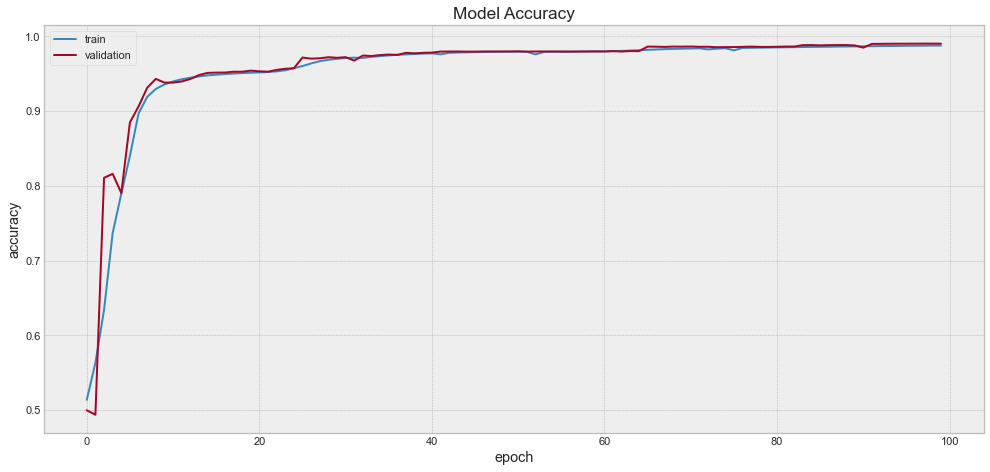

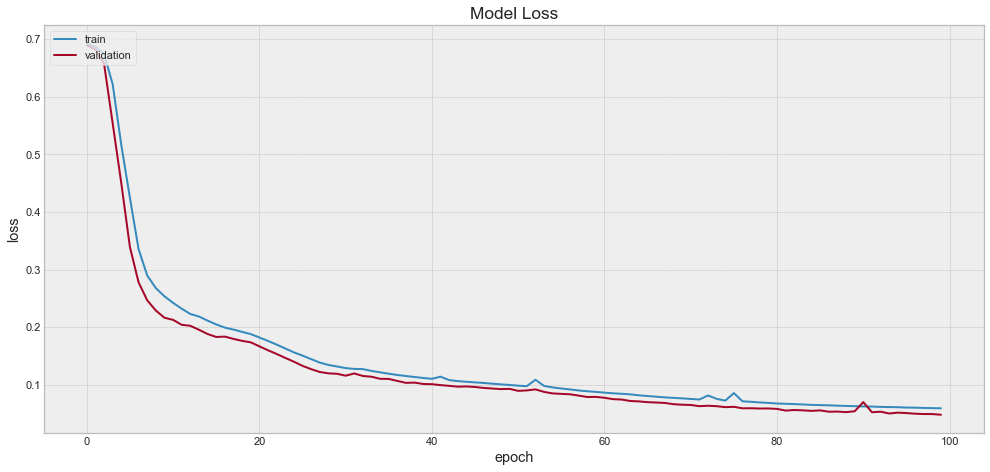

Accuracy: 0.9877752065658569
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 10, 128)           49920     
                                                                 
 dropout_3 (Dropout)         (None, 10, 128)           0         
                                                                 
 gru_4 (GRU)                 (None, 10, 64)            37056     
                                                                 
 dropout_4 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_5 (GRU)                 (None, 32)                9312      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)         

In [40]:
model_GRU_RUS = models.Sequential()
model_GRU_RUS.add(GRU(128, input_shape=(X_train_RUS.shape[1], 1), return_sequences=True, unroll=True))
model_GRU_RUS.add(Dropout(0.4))
model_GRU_RUS.add(GRU(64, return_sequences = True))
model_GRU_RUS.add(Dropout(0.4))
model_GRU_RUS.add(GRU(32))
model_GRU_RUS.add(Dropout(0.4))
model_GRU_RUS.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_GRU_RUS.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_GRU_RUS = model_GRU_RUS.fit(x_train_RUS, y_train_RUS, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_RUS, y_test_RUS))

predictions_GRU_RUS = model_GRU_RUS.predict(x_test_RUS)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_GRU_RUS.history['accuracy'])
plt.plot(history_GRU_RUS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_GRU_RUS.history['loss'])
plt.plot(history_GRU_RUS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_GRU_RUS.history['accuracy'][-1])

model_GRU_RUS.summary()
              
model_GRU_RUS.save("GRU_RUS.keras")

### With Imbalanced Handling - Using ROS

In [43]:
x_train_ROS = X_train_ROS.reshape(X_train_ROS.shape[0], X_train_ROS.shape[1], 1)
x_test_ROS = X_test_ROS.reshape(X_test_ROS.shape[0], X_test_ROS.shape[1], 1)

y_train_ROS = Y_train_ROS
y_test_ROS = Y_test_ROS

Epoch 1/100
9980/9980 [==============================] - 1003s 100ms/step - loss: 0.4094 - accuracy: 0.8254 - val_loss: 0.2023 - val_accuracy: 0.9471
Epoch 2/100
9980/9980 [==============================] - 991s 99ms/step - loss: 0.1841 - accuracy: 0.9513 - val_loss: 0.1474 - val_accuracy: 0.9638
Epoch 3/100
9980/9980 [==============================] - 991s 99ms/step - loss: 0.1363 - accuracy: 0.9671 - val_loss: 0.1170 - val_accuracy: 0.9710
Epoch 4/100
9980/9980 [==============================] - 981s 98ms/step - loss: 0.1186 - accuracy: 0.9729 - val_loss: 0.0843 - val_accuracy: 0.9836
Epoch 5/100
9980/9980 [==============================] - 988s 99ms/step - loss: 0.0880 - accuracy: 0.9831 - val_loss: 0.0773 - val_accuracy: 0.9845
Epoch 6/100
9980/9980 [==============================] - 995s 100ms/step - loss: 0.0819 - accuracy: 0.9846 - val_loss: 0.0741 - val_accuracy: 0.9856
Epoch 7/100
9980/9980 [==============================] - 988s 99ms/step - loss: 0.0807 - accuracy: 0.9848 - v

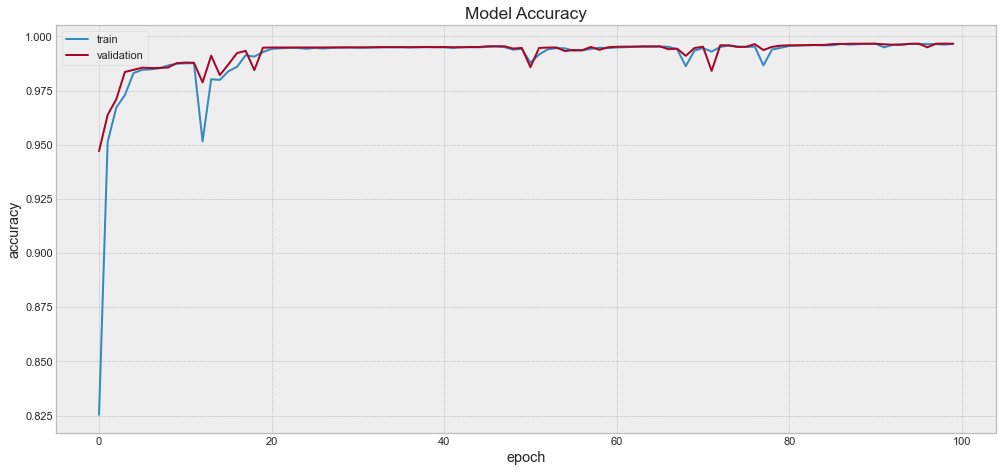

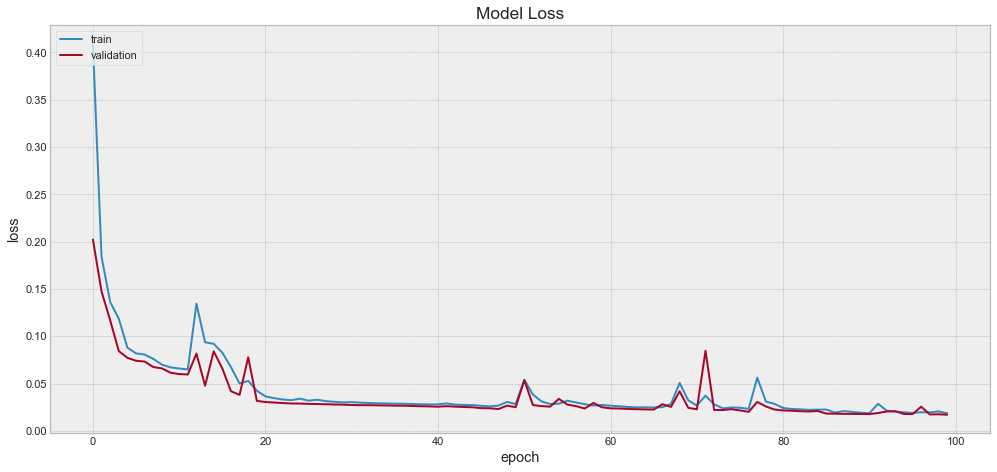

Accuracy: 0.9965916872024536
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_9 (GRU)                 (None, 10, 128)           49920     
                                                                 
 dropout_9 (Dropout)         (None, 10, 128)           0         
                                                                 
 gru_10 (GRU)                (None, 10, 64)            37056     
                                                                 
 dropout_10 (Dropout)        (None, 10, 64)            0         
                                                                 
 gru_11 (GRU)                (None, 32)                9312      
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)         

In [44]:
model_GRU_ROS = models.Sequential()
model_GRU_ROS.add(GRU(128, input_shape=(X_train_ROS.shape[1], 1), return_sequences=True, unroll=True))
model_GRU_ROS.add(Dropout(0.4))
model_GRU_ROS.add(GRU(64, return_sequences = True))
model_GRU_ROS.add(Dropout(0.4))
model_GRU_ROS.add(GRU(32))
model_GRU_ROS.add(Dropout(0.4))
model_GRU_ROS.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_GRU_ROS.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_GRU_ROS = model_GRU_ROS.fit(x_train_ROS, y_train_ROS, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_ROS, y_test_ROS))

predictions_GRU_ROS = model_GRU_ROS.predict(x_test_ROS)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_GRU_ROS.history['accuracy'])
plt.plot(history_GRU_ROS.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_GRU_ROS.history['loss'])
plt.plot(history_GRU_ROS.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_GRU_ROS.history['accuracy'][-1])

model_GRU_ROS.summary()
              
model_GRU_ROS.save("GRU_ROS.keras")

### With Imbalanced Handling - Using SMOTE

In [37]:
x_train_SMOTE = X_train_SMOTE.reshape(X_train_SMOTE.shape[0], X_train_SMOTE.shape[1], 1)
x_test_SMOTE = X_test_SMOTE.reshape(X_test_SMOTE.shape[0], X_test_SMOTE.shape[1], 1)

y_train_SMOTE = Y_train_SMOTE
y_test_SMOTE = Y_test_SMOTE

Epoch 1/100
9980/9980 [==============================] - 1006s 100ms/step - loss: 0.3864 - accuracy: 0.8423 - val_loss: 0.1966 - val_accuracy: 0.9429
Epoch 2/100
9980/9980 [==============================] - 989s 99ms/step - loss: 0.1909 - accuracy: 0.9511 - val_loss: 0.1635 - val_accuracy: 0.9541
Epoch 3/100
9980/9980 [==============================] - 989s 99ms/step - loss: 0.1469 - accuracy: 0.9622 - val_loss: 0.1229 - val_accuracy: 0.9708
Epoch 4/100
9980/9980 [==============================] - 992s 99ms/step - loss: 0.1224 - accuracy: 0.9723 - val_loss: 0.0987 - val_accuracy: 0.9791
Epoch 5/100
9980/9980 [==============================] - 992s 99ms/step - loss: 0.0927 - accuracy: 0.9802 - val_loss: 0.0622 - val_accuracy: 0.9881
Epoch 6/100
9980/9980 [==============================] - 996s 100ms/step - loss: 0.0588 - accuracy: 0.9889 - val_loss: 0.0419 - val_accuracy: 0.9912
Epoch 7/100
9980/9980 [==============================] - 995s 100ms/step - loss: 0.0496 - accuracy: 0.9909 - 

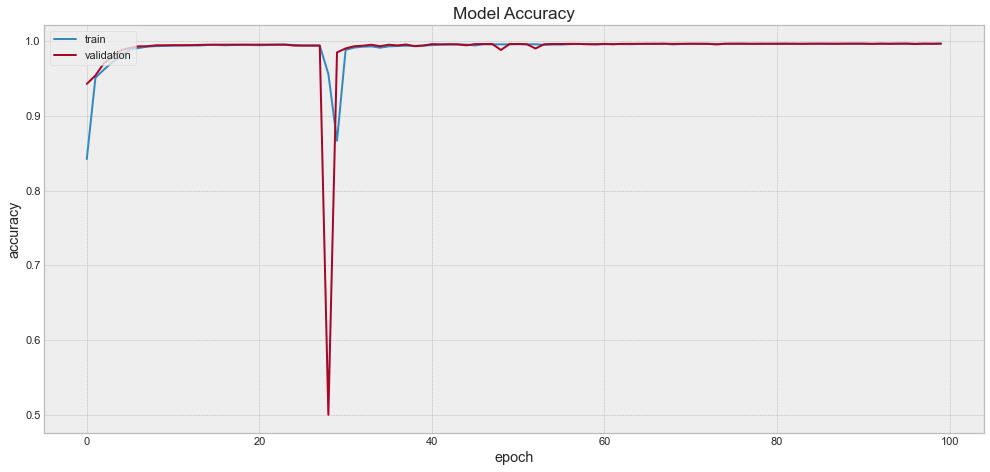

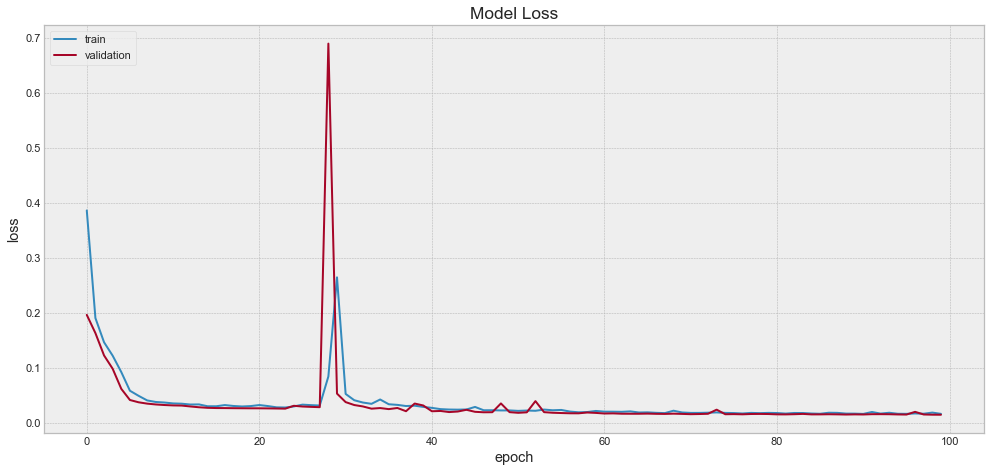

Accuracy: 0.9967657923698425
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 128)           49920     
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 gru_1 (GRU)                 (None, 10, 64)            37056     
                                                                 
 dropout_1 (Dropout)         (None, 10, 64)            0         
                                                                 
 gru_2 (GRU)                 (None, 32)                9312      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)             

In [38]:
model_GRU_SMOTE = models.Sequential()
model_GRU_SMOTE.add(GRU(128, input_shape=(X_train_SMOTE.shape[1], 1), return_sequences=True, unroll=True))
model_GRU_SMOTE.add(Dropout(0.4))
model_GRU_SMOTE.add(GRU(64, return_sequences = True))
model_GRU_SMOTE.add(Dropout(0.4))
model_GRU_SMOTE.add(GRU(32))
model_GRU_SMOTE.add(Dropout(0.4))
model_GRU_SMOTE.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

model_GRU_SMOTE.compile(optimizer = 'sgd', metrics = ['accuracy'], loss = ['binary_crossentropy'])

history_GRU_SMOTE = model_GRU_SMOTE.fit(x_train_SMOTE, y_train_SMOTE, epochs  = 100, verbose = 1, batch_size=2048, validation_data = (x_test_SMOTE, y_test_SMOTE))

predictions_GRU_SMOTE = model_GRU_SMOTE.predict(x_test_SMOTE)

#  "Accuracy"
plt.style.use('bmh')
plt.figure(figsize=(15,7))
plt.plot(history_GRU_SMOTE.history['accuracy'])
plt.plot(history_GRU_SMOTE.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.figure(figsize=(15,7))
plt.plot(history_GRU_SMOTE.history['loss'])
plt.plot(history_GRU_SMOTE.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Final accuracy
print ("Accuracy:", history_GRU_SMOTE.history['accuracy'][-1])

model_GRU_SMOTE.summary()
              
model_GRU_SMOTE.save("GRU_SMOTE.keras")